In [169]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib as mpl
import warnings
import numpy as np
from math import pi
from urllib.request import urlopen
import matplotlib.patheffects as pe
from highlight_text import fig_text
from adjustText import adjust_text
from tabulate import tabulate
import matplotlib.style as style
import unicodedata
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mplsoccer import Radar, FontManager
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

style.use('fivethirtyeight')

from PIL import Image
import urllib
import os
import math
from PIL import Image
import matplotlib.image as image
pd.options.display.max_columns = None

In [170]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [171]:
keepers = ['GK']
defenders = ["DF",'DF,MF']
wing_backs = ['FW,DF','DF,FW']
midfielders = ['MF,DF','MF']
forwards = ['FW','MF,FW',"FW,MF"]
def position_grouping(x):
    if x in keepers:
        return "GK"
    elif x in defenders:
        return "Defender"
    elif x in wing_backs:
        return "Wing-Back"
    elif x in midfielders:
        return "Central Midfielders"
    elif x in forwards:
        return "Forwards"
    else:
        return "unidentified position"

In [172]:
# Top 5 Europeans Legaues for advanced Analysis 

fbref_passing = 'https://fbref.com/en/comps/Big5/passing/players/Big-5-European-Leagues-Stats'
fbref_shooting = 'https://fbref.com/en/comps/Big5/shooting/players/Big-5-European-Leagues-Stats'
fbref_pass_type = 'https://fbref.com/en/comps/Big5/passing_types/players/Big-5-European-Leagues-Stats'
fbref_defence = 'https://fbref.com/en/comps/Big5/defense/players/Big-5-European-Leagues-Stats'
fbref_gca = 'https://fbref.com/en/comps/Big5/gca/players/Big-5-European-Leagues-Stats'
fbref_poss = 'https://fbref.com/en/comps/Big5/possession/players/Big-5-European-Leagues-Stats'
fbref_misc = 'https://fbref.com/en/comps/Big5/misc/players/Big-5-European-Leagues-Stats'

# Premier Legaue Stats for blog posts

# fbref_passing = 'https://fbref.com/en/comps/9/passing/Premier-League-Stats'
# fbref_shooting = 'https://fbref.com/en/comps/9/shooting/Premier-League-Stats'
# fbref_pass_type = 'https://fbref.com/en/comps/9/passing_types/Premier-League-Stats'
# fbref_defence = 'https://fbref.com/en/comps/9/gca/Premier-League-Stats'
# fbref_gca = 'https://fbref.com/en/comps/9/defense/Premier-League-Stats'
# fbref_poss = 'https://fbref.com/en/comps/9/possession/Premier-League-Stats'
# fbref_misc = 'https://fbref.com/en/comps/9/misc/Premier-League-Stats'

In [173]:
def create_full_stats_db(fbref_passing,fbref_shooting,fbref_pass_type,fbref_defence,fbref_gca,fbref_poss,fbref_misc):
    # Passing columns 
    pass_ = fbref_passing
    page =requests.get(pass_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(pass_).text.replace('<!--', '').replace('-->', '')
    pass_df = pd.read_html(html_content)
    pass_df[-1].columns = pass_df[-1].columns.droplevel(0)
    pass_stats = pass_df[-1]
    pass_prefixes = {1: 'Total - ', 2: 'Short - ', 3: 'Medium - ', 4: 'Long - '}
    pass_column_occurrences = {'Cmp': 0, 'Att': 0, 'Cmp%': 0}
    pass_new_column_names = []
    for col_name in pass_stats.columns:
        if col_name in pass_column_occurrences:
            pass_column_occurrences[col_name] += 1
            prefix = pass_prefixes[pass_column_occurrences[col_name]]
            pass_new_column_names.append(prefix + col_name)
        else:
            pass_new_column_names.append(col_name)
    pass_stats.columns = pass_new_column_names
    pass_stats = pass_stats[pass_stats['Player'] != 'Player']

    # Shooting columns 
    shot_ = fbref_shooting
    page =requests.get(shot_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(shot_).text.replace('<!--', '').replace('-->', '')
    shot_df = pd.read_html(html_content)
    shot_df[-1].columns = shot_df[-1].columns.droplevel(0) # drop top header row
    shot_stats = shot_df[-1]
    shot_stats = shot_stats[shot_stats['Player'] != 'Player']    



    # Pass Type columns 
    pass_type = fbref_pass_type
    page =requests.get(pass_type)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(pass_type).text.replace('<!--', '').replace('-->', '')
    pass_type_df = pd.read_html(html_content)
    pass_type_df[-1].columns = pass_type_df[-1].columns.droplevel(0) # drop top header row
    pass_type_stats = pass_type_df[-1]
    pass_type_stats = pass_type_stats[pass_type_stats['Player'] != 'Player']


    # GCA columns 
    gca_ = fbref_gca
    page =requests.get(gca_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(gca_).text.replace('<!--', '').replace('-->', '')
    gca_df = pd.read_html(html_content)
    gca_df[-1].columns = gca_df[-1].columns.droplevel(0)
    gca_stats = gca_df[-1]
    gca_prefixes = {1: 'SCA - ', 2: 'GCA - '}
    gca_column_occurrences = {'PassLive': 0, 'PassDead': 0, 'TO%': 0, 'Sh': 0, 'Fld': 0, 'Def': 0}
    gca_new_column_names = []
    for col_name in gca_stats.columns:
        if col_name in gca_column_occurrences:
            gca_column_occurrences[col_name] += 1
            prefix = gca_prefixes[gca_column_occurrences[col_name]]
            gca_new_column_names.append(prefix + col_name)
        else:
            gca_new_column_names.append(col_name)
    gca_stats.columns = gca_new_column_names
    gca_stats = gca_stats[gca_stats['Player'] != 'Player']
    

    # Defense columns 
    defence_ = fbref_defence
    page =requests.get(defence_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(defence_).text.replace('<!--', '').replace('-->', '')
    defence_df = pd.read_html(html_content)
    defence_df[-1].columns = defence_df[-1].columns.droplevel(0) # drop top header row
    defence_stats = defence_df[-1]
    rename_columns = {
    'Def 3rd': 'Tackles - Def 3rd',
    'Mid 3rd': 'Tackles - Mid 3rd',
    'Att 3rd': 'Tackles - Att 3rd',
    'Blocks': 'Total Blocks',
    'Sh': 'Shots Blocked',
    'Pass': 'Passes Blocked'}
    defence_stats.rename(columns = rename_columns, inplace=True)
    defence_prefixes = {1: 'Total - ', 2: 'Dribblers- '}
    defence_column_occurrences = {'Tkl': 0}
    new_column_names = []
    for col_name in defence_stats.columns:
        if col_name in defence_column_occurrences:
            defence_column_occurrences[col_name] += 1
            prefix = defence_prefixes[defence_column_occurrences[col_name]]
            new_column_names.append(prefix + col_name)
        else:
            new_column_names.append(col_name)
    defence_stats.columns = new_column_names
    defence_stats = defence_stats[defence_stats['Player'] != 'Player']


    # possession columns 
    poss_ = fbref_poss
    page =requests.get(poss_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(poss_).text.replace('<!--', '').replace('-->', '')
    poss_df = pd.read_html(html_content)
    poss_df[-1].columns = poss_df[-1].columns.droplevel(0) # drop top header row
    poss_stats = poss_df[-1]
    rename_columns = {
    'TotDist': 'Carries - TotDist',
    'PrgDist': 'Carries - PrgDist',
    'PrgC': 'Carries - PrgC',
    '1/3': 'Carries - 1/3',
    'CPA': 'Carries - CPA',
    'Mis': 'Carries - Mis',
    'Dis': 'Carries - Dis',
    'Att': 'Take Ons - Attempted'  }
    poss_stats.rename(columns=rename_columns, inplace=True)
    poss_stats = poss_stats[poss_stats['Player'] != 'Player']


    # misc columns 
    misc_ = fbref_misc
    page =requests.get(misc_)
    soup = BeautifulSoup(page.content, 'html.parser')
    html_content = requests.get(misc_).text.replace('<!--', '').replace('-->', '')
    misc_df = pd.read_html(html_content)
    misc_df[-1].columns = misc_df[-1].columns.droplevel(0) # drop top header row
    misc_stats = misc_df[-1]
    misc_stats = misc_stats[misc_stats['Player'] != 'Player']

    index_df = misc_stats[['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s']]

    data_frames = [poss_stats, misc_stats, pass_stats ,defence_stats, shot_stats, gca_stats, pass_type_stats]
    for df in data_frames:
        if df is not None:  # Checking if the DataFrame exists
            df.drop(columns=['Matches', 'Rk', 'Comp'], inplace=True, errors='ignore')
            df.dropna(axis=0, how='any', inplace=True)

            index_df = pd.merge(index_df, df, on=['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', '90s'], how='left')
    index_df["position_group"] = index_df.Pos.apply(lambda x: position_grouping(x))  

    index_df.fillna(0, inplace=True)

    non_numeric_cols = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'position_group']
    
    def clean_non_convertible_values(value):
        try:
            return pd.to_numeric(value)
        except (ValueError, TypeError):
            return np.nan

    index_df = index_df.reset_index()

    # Iterate through each column, converting non-numeric columns to numeric
    for col in index_df.columns:
        if col not in non_numeric_cols:
            index_df[col] = index_df[col].apply(clean_non_convertible_values)

    
    return index_df



In [174]:
def per_90fi(dataframe):
    # Replace empty strings ('') with NaN
    dataframe = dataframe.replace('', np.nan)
    
    # Fill NaN values with 0
    dataframe = dataframe.fillna(0)
    
    # Identify numeric columns excluding '90s' and columns with '90' or '%' in their names
    exclude_columns = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'Born', 'position_group']
    numeric_columns = [col for col in dataframe.columns if np.issubdtype(dataframe[col].dtype, np.number) 
                       and col != '90s' and not any(exc_col in col for exc_col in exclude_columns)
                       and ('90' not in col) and ('%' not in col)]
    
    # Create a mask to avoid division by zero
    mask = (dataframe['90s'] != 0)
    
    # Divide each numeric column by the '90s' column row-wise
    dataframe.loc[mask, numeric_columns] = dataframe.loc[mask, numeric_columns].div(dataframe.loc[mask, '90s'], axis=0)

    return dataframe



In [175]:
stats = create_full_stats_db(fbref_passing,fbref_shooting,fbref_pass_type,fbref_defence,fbref_gca,fbref_poss,fbref_misc)

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [176]:
stats

index             Player   Nation    Pos          Squad     Age  Born  \
0         0         Max Aarons  eng ENG     DF    Bournemouth  24-360  2000   
1         1     Rodrigo Abajas   es ESP     DF       Valencia  21-231  2003   
2         2     James Abankwah   ie IRL  DF,MF        Udinese  20-348  2004   
3         3  Keyliane Abdallah   fr FRA     FW      Marseille  18-268  2006   
4         4   Yunis Abdelhamid   ma MAR     DF  Saint-Étienne  37-092  1987   
...     ...                ...      ...    ...            ...     ...   ...   
2398   2398      Yanis Zouaoui   dz ALG  DF,FW       Le Havre  30-172  1994   
2399   2399      Igor Zubeldia   es ESP     DF  Real Sociedad  27-274  1997   
2400   2400   Martín Zubimendi   es ESP     MF  Real Sociedad  25-331  1999   
2401   2401    Martin Ødegaard   no NOR     MF        Arsenal  26-012  1998   
2402   2402        Milan Đurić   ba BIH     FW          Monza  34-221  1990   

       90s  Touches  Def Pen  Def 3rd  Mid 3rd  Att 3rd  Att Pen  Live_x  \
0      0.9       61        1       15       33       14        0      61   
1      0.7       36        1        8       19        9        1      36   
2      0.8        0        0        0        0        0        0       0   
3      0.0        0        0        0        0        0        0       0   
4     10.4      611      122      391      209       13        6     611   
...    ...      ...      ...      ...      ...      ...      ...     ...   
2398   2.6      184        3       40       82       65        4     184   
2399  15.4     1062      102      504      541       20        8    1062   
2400  16.0     1113       58      254      715      153       27    1113   
2401   9.1      634        3       34      281      326       53     633   
2402  12.2      299       15       35      170       97       29     299   

      Take Ons - Attempted  Succ  Succ%  Tkld  Tkld%  Carries  \
0                        2     0    0.0     1   50.0       35   
1                        1     1  100.0     0    0.0       13   
2                        0     0    0.0     0    0.0        0   
3                        0     0    0.0     0    0.0        0   
4                        6     3   50.0     3   50.0      311   
...                    ...   ...    ...   ...    ...      ...   
2398                    11     7   63.6     3   27.3       98   
2399                     1     1  100.0     0    0.0      633   
2400                    21    14   66.7     7   33.3      537   
2401                    29    14   48.3    14   48.3      447   
2402                     3     3  100.0     0    0.0      116   

      Carries - TotDist  Carries - PrgDist  Carries - PrgC  Carries - 1/3  \
0                   135                 61               1              0   
1                   101                 67               3              2   
2                     0                  0               0              0   
3                     0                  0               0              0   
4                  1692                833               4              1   
...                 ...                ...             ...            ...   
2398                627                370               7              8   
2399               3622               2362              12              5   
2400               2922               1376              25             18   
2401               2643               1350              33             30   
2402                299                109               2              1   

      Carries - CPA  Carries - Mis  Carries - Dis  Rec  PrgR  CrdY  CrdR  \
0                 0              1              0   34     3     0     0   
1                 1              0              2   16     3     1     0   
2                 0              0              0    0     0     0     0   
3                 0              0              0    0     0     0     0   
4                 0              8              3  382    

In [177]:
player_name = "Mohamed Salah" 

In [178]:
player_row = stats.loc[stats['Player'] == player_name]
if not player_row.empty:
    position = player_row['position_group'].values[0]
    print(f"The position of {player_name} is {position}.")
else:
    print(f"Player {player_name} not found in the dataset.")


The position of Mohamed Salah is Forwards.


In [179]:
def key_stats_db(df,position):
    non_numeric_cols = ['Player', 'Nation', 'Pos', 'Squad', 'Age', 'position_group']
    core_stats = ['90s','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Blocks', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']
    # KMeans_cols = ["Player"] + list(df.columns[8:-1])
    df.dropna(axis=0, how='any', inplace=True)
    key_stats_df = df[df['position_group'] == position]
    key_stats_df = key_stats_df[non_numeric_cols + core_stats]
    key_stats_df = key_stats_df[key_stats_df['90s'] >= 4]
    key_stats_df['Age'] = key_stats_df['Age'].astype(str).str.split('-').str[0]
    key_stats_df['Age'] = pd.to_numeric(key_stats_df['Age'], errors='coerce')
    key_stats_df = key_stats_df.drop_duplicates(subset=['Player'], keep='first')
    # key_stats_df = key_stats_df[key_stats_df['Age'] < 27]
    key_stats_df = per_90fi(key_stats_df)
    return key_stats_df


key_stats_df = key_stats_db(stats,position)

In [180]:
key_stats_df

Player   Nation    Pos           Squad  Age position_group  \
5         Himad Abdelli   dz ALG  MF,FW          Angers   25       Forwards   
12       Matthis Abline   fr FRA     FW          Nantes   21       Forwards   
14    Zakaria Aboukhlal   ma MAR  MF,FW        Toulouse   24       Forwards   
17        Tammy Abraham  eng ENG     FW           Milan   27       Forwards   
20           Akor Adams   ng NGA     FW     Montpellier   24       Forwards   
...                 ...      ...    ...             ...  ...            ...   
2381     Bryan Zaragoza   es ESP  FW,MF         Osasuna   23       Forwards   
2382      Anass Zaroury   ma MAR  FW,MF            Lens   24       Forwards   
2391      Edon Zhegrova   xk KVX  FW,MF           Lille   25       Forwards   
2394     Joshua Zirkzee   nl NED  FW,MF  Manchester Utd   23       Forwards   
2402        Milan Đurić   ba BIH     FW           Monza   34       Forwards   

       90s  Total - Cmp%        KP        TB        Sw       PPA      PrgP  \
5     14.8          81.2  1.554054  0.945946  0.405405  1.418919  7.027027   
12    12.6          71.6  0.793651  0.079365  0.238095  0.714286  2.063492   
14    13.1          61.8  0.610687  0.000000  0.000000  0.534351  1.374046   
17     5.9          71.3  1.016949  0.169492  0.000000  0.677966  1.186441   
20    10.2          62.4  1.078431  0.000000  0.196078  0.000000  0.490196   
...    ...           ...       ...       ...       ...       ...       ...   
2381  11.7          58.9  1.709402  0.256410  0.170940  1.538462  2.222222   
2382   7.1          64.2  2.112676  0.281690  0.140845  1.830986  4.084507   
2391  10.9          76.0  1.467890  0.183486  0.091743  2.385321  4.954128   
2394   7.5          74.4  1.066667  0.133333  0.133333  0.400000  2.800000   
2402  12.2          48.9  0.409836  0.000000  0.163934  0.163934  1.393443   

       Tkl%    Blocks   Tkl+Int       Clr  Carries - PrgDist  SCA90  GCA90  \
5      34.8  1.013514  2.364865  0.743243         136.959459   3.11   0.14   
12     16.7  0.873016  0.634921  1.587302          46.428571   1.98   0.16   
14     28.6  0.687023  1.374046  0.381679          47.557252   1.75   0.30   
17    100.0  0.508475  1.355932  0.677966          10.338983   2.86   0.50   
20     66.7  0.686275  0.392157  0.392157          24.019608   2.15   0.39   
...     ...       ...       ...       ...                ...    ...    ...   
2381   25.0  0.854701  0.940171  0.683761         129.572650   3.34   0.60   
2382   25.0  1.830986  0.985915  0.563380          77.464789   3.37   0.14   
2391   28.6  0.733945  0.825688  0.091743         113.394495   3.50   0.28   
2394  100.0  0.933333  0.933333  0.266667          30.800000   2.54   0.27   
2402    0.0  0.081967  0.245902  1.065574           8.934426   0.56   0.08   

         CrsPA        xA        Rec      PrgR        xG        Sh       SoT  
5     0.000000  0.135135  50.675676  3.918919  0.283784  1.216216  0.270270  
12    0.079365  0.134921  23.412698  6.587302  0.246032  3.015873  0.952381  
14    0.152672  0.106870  22.824427  7.862595  0.572519  3.053435  1.374046  
17    0.000000  0.118644  16.610169  5.762712  0.898305  2.881356  1.355932  
20    0.000000  0.009804  14.803922  3.529412  0.401961  2.352941  1.176471  
...        ...       ...        ...       ...       ...       ...       ...  
2381  0.940171  0.282051  24.102564  7.094017  0.153846  1.538462  0.598291  
2382  0.422535  0.183099  34.788732  6.760563  0.126761  2.112676  0.704225  
2391  0.275229  0.220183  36.330275  7.431193  0.211009  2.110092  0.825688  
2394  0.000000  0.066667  27.333333  4.000000  0.400000  2.133333  1.066667  
2402  0.000000  0.016393  19.754098  2.213115  0.221311  1.721311  0.737705  

[476 rows x 27 columns]

In [181]:
def create_metrics_scores(key_stats_df):
    # Define the key_stats grouped by the metrics
    core_stats = ['90s','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Blocks', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']
    passing_metrics = ['Total - Cmp%', 'KP', 'TB', 'Sw', 'PPA', 'PrgP']
    defending_metrics = ['Tkl%', 'Blocks', 'Tkl+Int', 'Clr']
    creation_metrics = ['Carries - PrgDist', 'SCA90', 'GCA90', 'CrsPA', 'xA', 'Rec', 'PrgR']
    shooting_metrics = ['xG', 'Sh', 'SoT']

    # Create a MinMaxScaler instance
    scaler = MinMaxScaler()

    # Normalize the metrics
    stats_normalized = key_stats_df.copy()  # Create a copy of the DataFrame
    stats_normalized[core_stats] = scaler.fit_transform(stats_normalized[core_stats])

    # Calculate scores for each metric grouping and scale to 0-10
    stats_normalized['Passing_Score'] = stats_normalized[passing_metrics].mean(axis=1) * 10
    stats_normalized['Defending_Score'] = stats_normalized[defending_metrics].mean(axis=1) * 10
    stats_normalized['Creation_Score'] = stats_normalized[creation_metrics].mean(axis=1) * 10
    stats_normalized['Shooting_Score'] = stats_normalized[shooting_metrics].mean(axis=1) * 10

    # Add a small offset to ensure unique scores
    stats_normalized['Passing_Score'] += stats_normalized.index * 0.001
    stats_normalized['Defending_Score'] += stats_normalized.index * 0.001
    stats_normalized['Creation_Score'] += stats_normalized.index * 0.001
    stats_normalized['Shooting_Score'] += stats_normalized.index * 0.001

    # Clip scores to ensure they are within the 0-10 range
    stats_normalized[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']] = stats_normalized[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']].clip(lower=0, upper=10)
    return stats_normalized

def adjust_player_rating_range(dataframe):
    # Get the 'total player rating' column
    player_ratings = dataframe[['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']]
    
    # Define the desired range for the ratings
    min_rating = 4.5
    max_rating = 9.5
    
    # Normalize the ratings to be within the desired range (5 to 9.5) for each column
    for col in player_ratings.columns:
        normalized_ratings = min_rating + (max_rating - min_rating) * ((player_ratings[col] - player_ratings[col].min()) / (player_ratings[col].max() - player_ratings[col].min()))
        dataframe[col] = normalized_ratings
    
    return dataframe


pitch_iq_scoring = create_metrics_scores(key_stats_df)
pitch_iq_scoring = adjust_player_rating_range(pitch_iq_scoring)
pitch_iq_scoring = pitch_iq_scoring[['Player','Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']]
pitch_iq_scores = pd.merge(key_stats_df, pitch_iq_scoring, on='Player', how='left')


In [182]:
pitch_iq_scores

Player   Nation    Pos           Squad  Age position_group  \
0        Himad Abdelli   dz ALG  MF,FW          Angers   25       Forwards   
1       Matthis Abline   fr FRA     FW          Nantes   21       Forwards   
2    Zakaria Aboukhlal   ma MAR  MF,FW        Toulouse   24       Forwards   
3        Tammy Abraham  eng ENG     FW           Milan   27       Forwards   
4           Akor Adams   ng NGA     FW     Montpellier   24       Forwards   
..                 ...      ...    ...             ...  ...            ...   
471     Bryan Zaragoza   es ESP  FW,MF         Osasuna   23       Forwards   
472      Anass Zaroury   ma MAR  FW,MF            Lens   24       Forwards   
473      Edon Zhegrova   xk KVX  FW,MF           Lille   25       Forwards   
474     Joshua Zirkzee   nl NED  FW,MF  Manchester Utd   23       Forwards   
475        Milan Đurić   ba BIH     FW           Monza   34       Forwards   

      90s  Total - Cmp%        KP        TB        Sw       PPA      PrgP  \
0    14.8          81.2  1.554054  0.945946  0.405405  1.418919  7.027027   
1    12.6          71.6  0.793651  0.079365  0.238095  0.714286  2.063492   
2    13.1          61.8  0.610687  0.000000  0.000000  0.534351  1.374046   
3     5.9          71.3  1.016949  0.169492  0.000000  0.677966  1.186441   
4    10.2          62.4  1.078431  0.000000  0.196078  0.000000  0.490196   
..    ...           ...       ...       ...       ...       ...       ...   
471  11.7          58.9  1.709402  0.256410  0.170940  1.538462  2.222222   
472   7.1          64.2  2.112676  0.281690  0.140845  1.830986  4.084507   
473  10.9          76.0  1.467890  0.183486  0.091743  2.385321  4.954128   
474   7.5          74.4  1.066667  0.133333  0.133333  0.400000  2.800000   
475  12.2          48.9  0.409836  0.000000  0.163934  0.163934  1.393443   

      Tkl%    Blocks   Tkl+Int       Clr  Carries - PrgDist  SCA90  GCA90  \
0     34.8  1.013514  2.364865  0.743243         136.959459   3.11   0.14   
1     16.7  0.873016  0.634921  1.587302          46.428571   1.98   0.16   
2     28.6  0.687023  1.374046  0.381679          47.557252   1.75   0.30   
3    100.0  0.508475  1.355932  0.677966          10.338983   2.86   0.50   
4     66.7  0.686275  0.392157  0.392157          24.019608   2.15   0.39   
..     ...       ...       ...       ...                ...    ...    ...   
471   25.0  0.854701  0.940171  0.683761         129.572650   3.34   0.60   
472   25.0  1.830986  0.985915  0.563380          77.464789   3.37   0.14   
473   28.6  0.733945  0.825688  0.091743         113.394495   3.50   0.28   
474  100.0  0.933333  0.933333  0.266667          30.800000   2.54   0.27   
475    0.0  0.081967  0.245902  1.065574           8.934426   0.56   0.08   

        CrsPA        xA        Rec      PrgR        xG        Sh       SoT  \
0    0.000000  0.135135  50.675676  3.918919  0.283784  1.216216  0.270270   
1    0.079365  0.134921  23.412698  6.587302  0.246032  3.015873  0.952381   
2    0.152672  0.106870  22.824427  7.862595  0.572519  3.053435  1.374046   
3    0.000000  0.118644  16.610169  5.762712  0.898305  2.881356  1.355932   
4    0.000000  0.009804  14.803922  3.529412  0.401961  2.352941  1.176471   
..        ...       ...        ...       ...       ...       ...       ...   
471  0.940171  0.282051  24.102564  7.094017  0.153846  1.538462  0.598291   
472  0.422535  0.183099  34.788732  6.760563  0.126761  2.112676  0.704225   
473  0.275229  0.220183  36.330275  7.431193  0.211009  2.110092  0.825688   
474  0.000000  0.066667  27.333333  4.000000  0.400000  2.133333  1.066667   
475  0.000000  0.016393  19.754098  2.213115  0.221311  1.721311  0.737705   

     Passing_Score  Defending_Score  Creation_Score  Shooting_Score  
0         7.179669         6.320966        5.976936        5.081805  
1         5.533441         5.893945        5.310649        6.121769  
2         5.066426         5.508599        5.433411        6.948244  
3         5.

## Creating Player Similarity Model 
### K Means Clustering 

In [183]:
def create_kmeans_df(df): 
    KMeans_cols = ['Player','Total - Cmp%','KP', 'TB','Sw','PPA', 'PrgP','Tkl%','Blocks', 'Tkl+Int','Clr', 'Carries - PrgDist','SCA90','GCA90','CrsPA','xA', 'Rec','PrgR','xG', 'Sh','SoT']
    # KMeans_cols = ["Player"] + list(df.columns[8:-1])
    df = df[KMeans_cols]
    player_names = df['Player'].tolist() 

    df = df.drop(['Player'], axis = 1) 

    x = df.values 
    scaler = preprocessing.MinMaxScaler()
    x_scaled = scaler.fit_transform(x)
    X_norm = pd.DataFrame(x_scaled)

    pca = PCA(n_components = 2)
    reduced = pd.DataFrame(pca.fit_transform(X_norm))

    wcss = [] 
    for i in range(1, 11): 
        kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
        kmeans.fit(reduced) 
        wcss.append(kmeans.inertia_)

    kmeans = KMeans(n_clusters=2)
    kmeans = kmeans.fit(reduced)

    labels = kmeans.predict(reduced)
    clusters = kmeans.labels_.tolist()

    reduced['cluster'] = clusters
    reduced['name'] = player_names
    reduced.columns = ['x', 'y', 'cluster', 'name']

    reduced['cluster'] = clusters
    reduced['name'] = player_names
    reduced.columns = ['x', 'y', 'cluster', 'name']
    reduced.head()

    return reduced

kmeans_df = create_kmeans_df(key_stats_df)



/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:54: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/stephenahiabah/anaconda

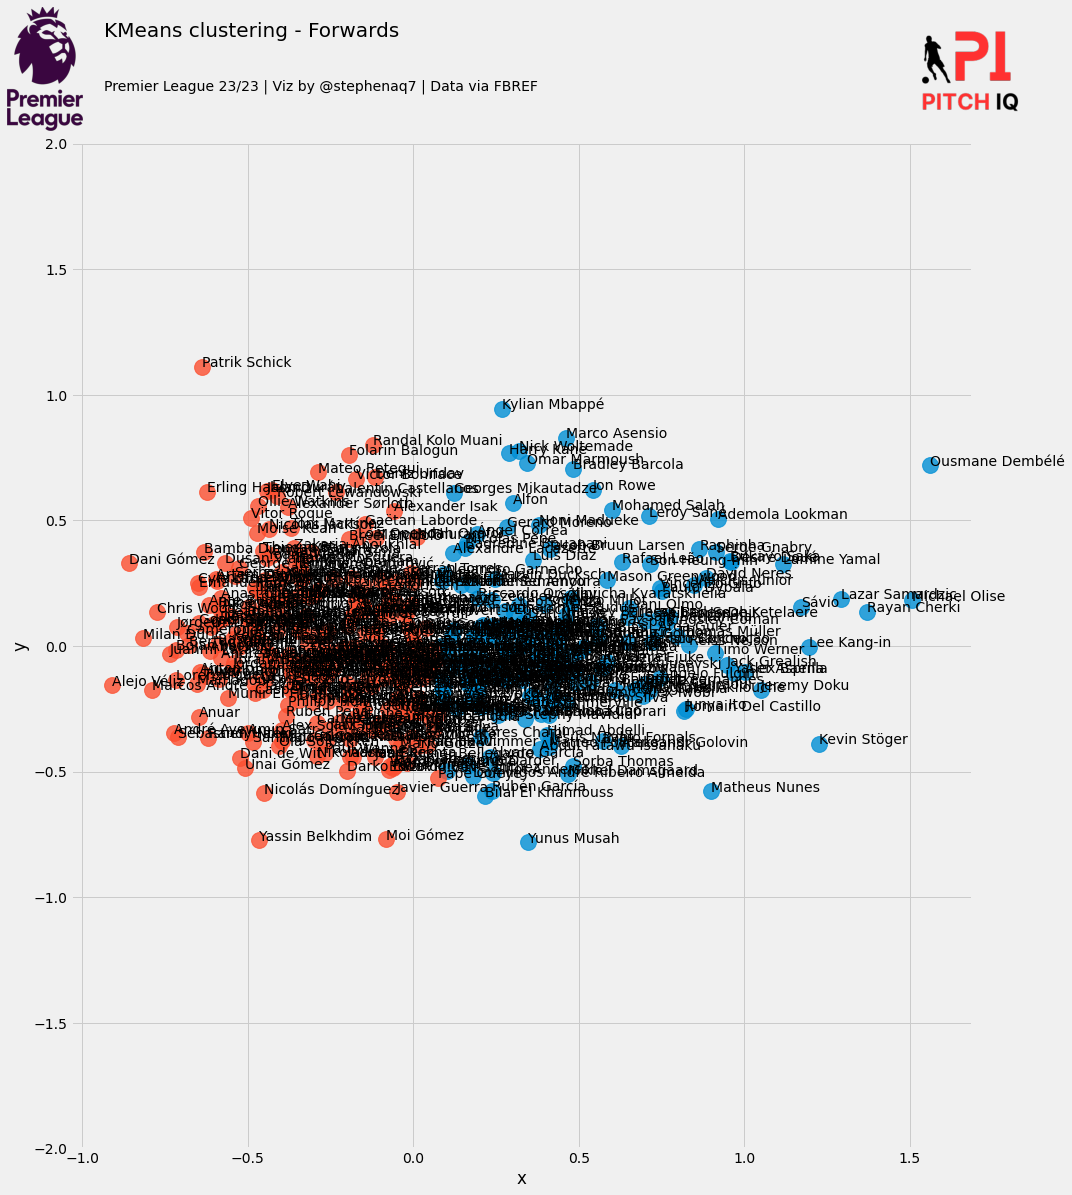

In [184]:
def create_clustering_chart(df,position):
    # Create the scatter plot using lmplot
    ax = sns.lmplot(x="x", y="y", hue='cluster', data=df, legend=False,
                    fit_reg=False, height=15, scatter_kws={"s": 250})

    texts = []
    for x, y, s in zip(df.x, df.y, df.name):
        texts.append(plt.text(x, y, s,fontweight='light'))


    # Additional axes for logos and titles
    fig = plt.gcf()
    ax1 = plt.gca()

    # Add title and logos to the current figure
    fig.text(.1, 1.08, f'KMeans clustering - {position}', size=20, font='Karla')
    fig.text(.1, 1.03, 'Premier League 23/23 | Viz by @stephenaq7 | Data via FBREF', size=14, font='Karla')

    ax2 = fig.add_axes([0.01, 0.175, 0.07, 1.75])
    ax2.axis('off')
    img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png')
    ax2.imshow(img)

    ax3 = fig.add_axes([0.85, 0.175, 0.1, 1.75])
    ax3.axis('off')
    img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
    ax3.imshow(img)

    # Set axis limits and labels for the lmplot
    ax1.set(ylim=(-2, 2))
    plt.tick_params(labelsize=15)
    plt.xlabel("PC 1", fontsize=20)
    plt.ylabel("PC 2", fontsize=20)

    plt.tight_layout()
    plt.show()
    
create_clustering_chart(kmeans_df,position)

In [185]:
def find_similar_players(player_name, df, top_n=30):
    player = df[df['name'] == player_name].iloc[0]
    df['distance'] = np.sqrt((df['x'] - player['x'])**2 + (df['y'] - player['y'])**2)
    
    max_distance = df['distance'].max()  
    
    df['perc_similarity'] = (((max_distance - df['distance']) / max_distance) * 100) * 0.90
    
    similar_players = df.sort_values('distance').head(top_n + 1)  
    similar_players = similar_players[1:] 
    
    return similar_players


In [186]:
kmeans_df

x         y  cluster               name
0    0.404900 -0.354265        0      Himad Abdelli
1   -0.325335  0.117460        1     Matthis Abline
2   -0.361725  0.388106        1  Zakaria Aboukhlal
3   -0.343289  0.318963        1      Tammy Abraham
4   -0.577960  0.149916        1         Akor Adams
..        ...       ...      ...                ...
471  0.247052 -0.090783        0     Bryan Zaragoza
472  0.267452 -0.098571        0      Anass Zaroury
473  0.308978  0.056634        0      Edon Zhegrova
474 -0.262184 -0.037803        1     Joshua Zirkzee
475 -0.816022  0.030788        1        Milan Đurić

[476 rows x 4 columns]

In [187]:
similairty_table = find_similar_players(player_name, kmeans_df)[['name','perc_similarity']]
similairty_table.rename(columns={'name': 'Player'}, inplace=True)
# Assuming 'pitchiq_scores' and 'similarity' are the DataFrames and you want to merge based on the 'Player' column
mertrics_similarity = pd.merge(similairty_table, pitch_iq_scores, on='Player', how='left')
mertrics_similarity = mertrics_similarity.drop_duplicates(subset=['Player'])
mertrics_similarity = mertrics_similarity[mertrics_similarity['Age'] < 28]


In [188]:
comparative_list = list(mertrics_similarity.Player.unique())
sim_index = list(mertrics_similarity.perc_similarity.unique())
sim_index = [round(item, 2) for item in sim_index]


In [189]:
met_sim = mertrics_similarity

In [190]:
mertrics_similarity

Player  perc_similarity   Nation    Pos           Squad  \
0                Jon Rowe        84.710894  eng ENG  FW,MF       Marseille   
2         Bradley Barcola        79.319957   fr FRA     FW       Paris S-G   
3             Rafael Leão        78.756726   pt POR     FW           Milan   
4            Noni Madueke        77.697084  eng ENG     FW         Chelsea   
6      Jacob Bruun Larsen        76.897448   dk DEN  FW,MF      Hoffenheim   
7         Mason Greenwood        75.020692  eng ENG  FW,MF       Marseille   
8                   Alfon        73.958038   es ESP  FW,MF      Celta Vigo   
10              Luis Díaz        73.483494   co COL     FW       Liverpool   
11          Omar Marmoush        73.224763   eg EGY  FW,MF  Eint Frankfurt   
13        Ademola Lookman        72.951416   ng NGA  FW,MF        Atalanta   
18         Nick Woltemade        70.453580   de GER  FW,MF       Stuttgart   
19  Khvicha Kvaratskhelia        70.246751   ge GEO  FW,MF          Napoli   
21        Vinicius Júnior        69.459951   br BRA     FW     Real Madrid   
22            David Neres        69.252374   br BRA  FW,MF          Napoli   
23              Dani Olmo        68.910117   es ESP  MF,FW       Barcelona   
24            Enzo Millot        68.853388   fr FRA  MF,FW       Stuttgart   
25            Bukayo Saka        68.182345  eng ENG  FW,MF         Arsenal   
26            Désiré Doué        67.970596   fr FRA     FW       Paris S-G   
28                Rodrygo        67.196182   br BRA     FW     Real Madrid   
29     Eliesse Ben Seghir        67.175400   ma MAR  MF,FW          Monaco   

    Age position_group   90s  Total - Cmp%        KP        TB        Sw  \
0    21       Forwards   4.3          82.7  2.093023  0.697674  0.000000   
2    22       Forwards  11.7          82.7  1.794872  0.170940  0.085470   
3    25       Forwards  11.5          76.9  2.434783  0.521739  0.173913   
4    22       Forwards  11.5          79.4  1.391304  0.086957  0.173913   
6    26       Forwards   4.4          74.2  1.818182  0.454545  0.454545   
7    23       Forwards  14.1          76.7  1.347518  0.212766  1.063830   
8    25       Forwards   4.2          70.4  1.904762  0.000000  0.000000   
10   27       Forwards  10.7          84.6  1.962617  0.093458  0.000000   
11   25       Forwards  14.1          68.5  2.127660  0.354610  0.000000   
13   27       Forwards  10.4          73.3  3.173077  0.192308  0.096154   
18   22       Forwards   4.1          71.8  1.951220  0.243902  0.000000   
19   23       Forwards  12.3          76.4  2.032520  0.569106  0.406504   
21   24       Forwards  12.2          74.2  2.377049  0.491803  0.737705   
22   27       Forwards   4.4          75.7  2.045455  0.227273  0.000000   
23   26       Forwards   6.9          76.1  1.159420  1.014493  0.579710   
24   22       Forwards  11.4          86.2  1.228070  0.175439  0.350877   
25   23       Forwards  14.1          74.4  2.978723  0.283688  0.141844   
26   19       Forwards   6.5          82.2  2.769231  0.461538  0.461538   
28   23       Forwards  10.9          85.3  2.477064  0.091743  0.000000   
29   19       Forwards  11.6          76.7  1.637931  0.431034  0.172414   

         PPA      PrgP  Tkl%    Blocks   Tkl+Int       Clr  Carries - PrgDist  \
0   1.162791  2.790698  66.7  1.395349  1.627907  0.000000         104.186047   
2   1.452991  3.333333   7.7  1.196581  1.709402  0.341880         149.230769   
3   1.913043  4.000000  50.0  1.043478  0.956522  0.000000         126.956522   
4   2.086957  3.826087  42.9  0.869565  1.652174  0.434783         163.217391   
6   1.363636  3.636364  37.5  0.681818  1.136364  0.454545         107.045455   
7   2.127660  3.758865  44.0  0.567376  1.773050  0.354610         134.822695   
8   0.714286  2.142857  25.0  1.428571  1.190476  0.476190         155.476190   
10  1.588785  4.112150  42.9  0.841121  1.495327  0.373832         115.981308   
11  1.205674  2.695035  42.9  0.638298  0.921986  0.14

In [191]:
params = ['Total - Cmp%','KP',
'PPA',
 'PrgP',
 'Tkl%',
 'Blocks',
 'Tkl+Int',
 'Clr',
 'Carries - PrgDist',
 'SCA90',
 'xA',
 'xG']

In [192]:
def plot_comparison_radars(player_name, params, comparative_list, pitch_iq_scores, metrics_similarity, sim_index):
    def get_player_data(df, player_name, params):
        player_data = df[df['Player'] == player_name][params].values.tolist()
        # Flatten the list
        return [val for sublist in player_data for val in sublist]
    
    main_player = get_player_data(pitch_iq_scores, player_name, params)
    comp_players = [get_player_data(metrics_similarity, comp, params) for comp in comparative_list]
    
    def convert_to_numeric(input_list):
        return [float(x) for x in input_list]
    
    numeric_main_player = convert_to_numeric(main_player)
    
    for idx, comp_player in enumerate(comp_players):
        numeric_comp_player = convert_to_numeric(comp_player)
        
        low = [min(value, value_2) * 0.5 for value, value_2 in zip(numeric_main_player, numeric_comp_player)]
        high = [max(value, value_2) * 1.05 for value, value_2 in zip(numeric_main_player, numeric_comp_player)]
        
        radar = Radar(params, low, high,
                      round_int=[False]*len(params),
                      num_rings=5,
                      ring_width=1, center_circle_radius=1)
        
        fig, ax = radar.setup_axis()
        fig.patch.set_facecolor('#f0f0f0')
        ax.set_facecolor('#f0f0f0')
        
        rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2')
        radar_output = radar.draw_radar_compare(numeric_main_player, numeric_comp_player, ax=ax,
                                                kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                                kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
        radar_poly, radar_poly2, vertices1, vertices2 = radar_output
        range_labels = radar.draw_range_labels(ax=ax, fontsize=15)
        param_labels = radar.draw_param_labels(ax=ax, fontsize=15)
        
        ax.legend([player_name, comparative_list[idx]], loc='upper right', fontsize=12)
        
        league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
        league_ax = fig.add_axes([0.002, 0.89, 0.20, 0.15], zorder=1)
        league_ax.imshow(league_icon)
        league_ax.axis("off")
        
        fig_text(
            x=0.57, y=0.90,
            s=f"{player_name} vs {comparative_list[idx]}\nSeason 2023/2024\nPitch IQ Similarity Score: {sim_index[idx]}%\nViz by @stephenaq7.",
            va="bottom", ha="right",
            fontsize=20, color="black", font="Karla", weight="book"
        )
        
        ax3 = fig.add_axes([0.80, 0.09, 0.13, 1.75])
        ax3.axis('off')
        img = image.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
        ax3.imshow(img)
        
        plt.show()



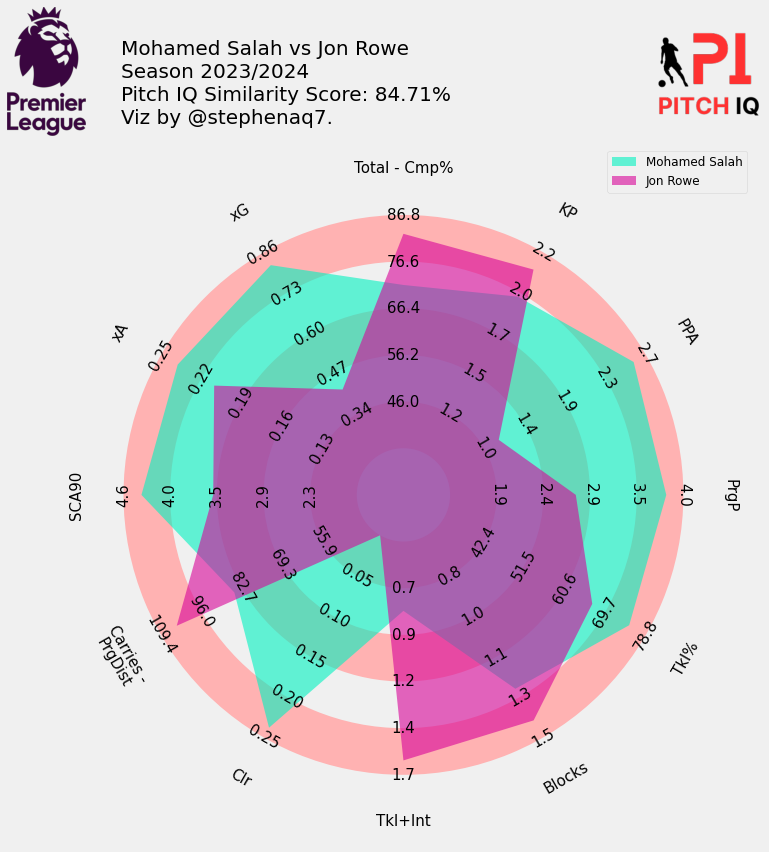

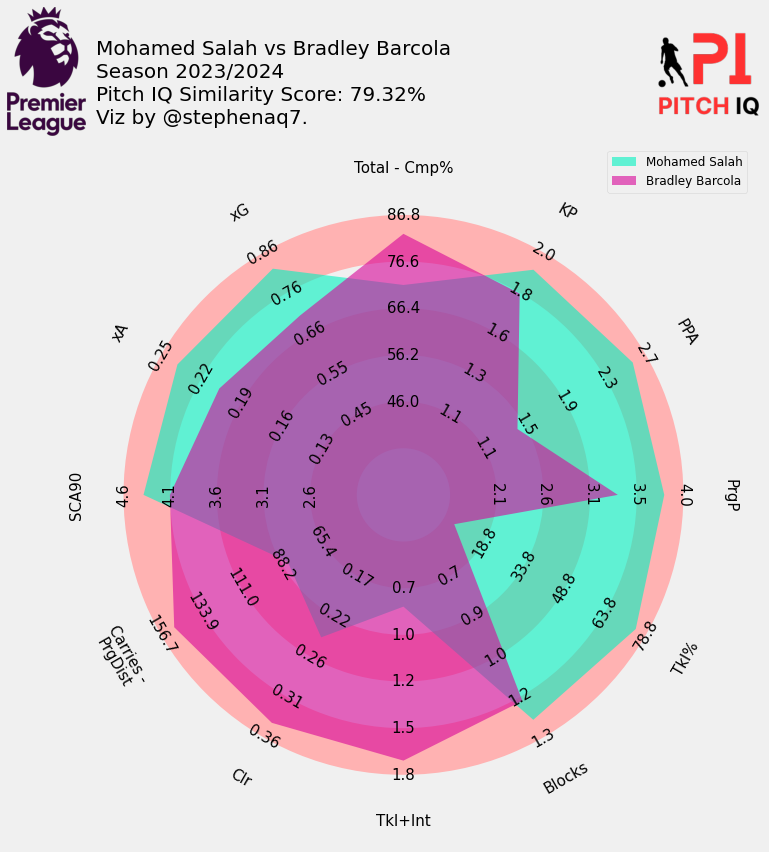

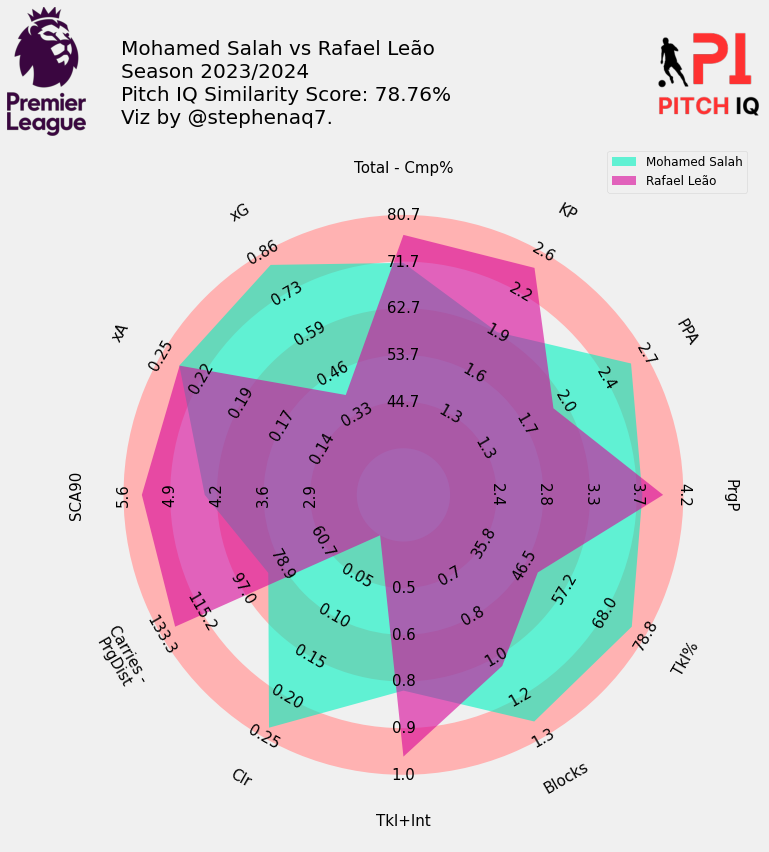

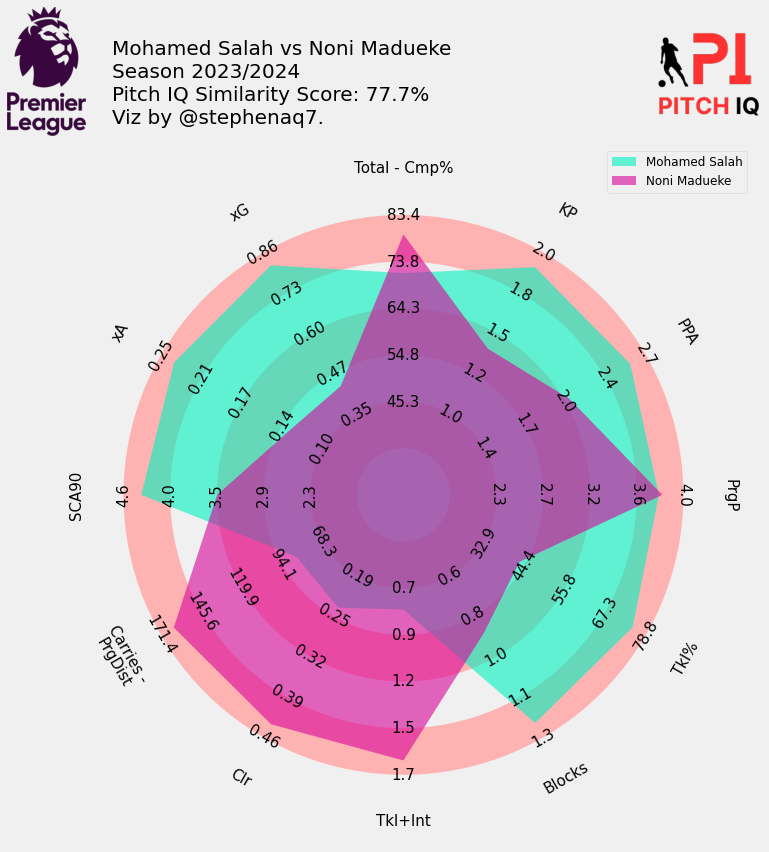

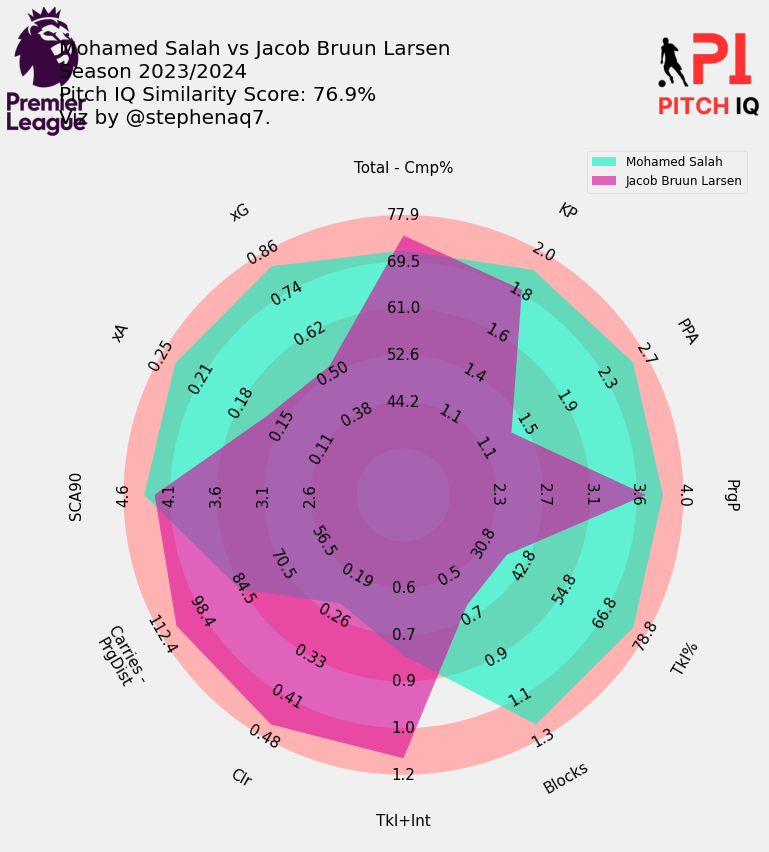

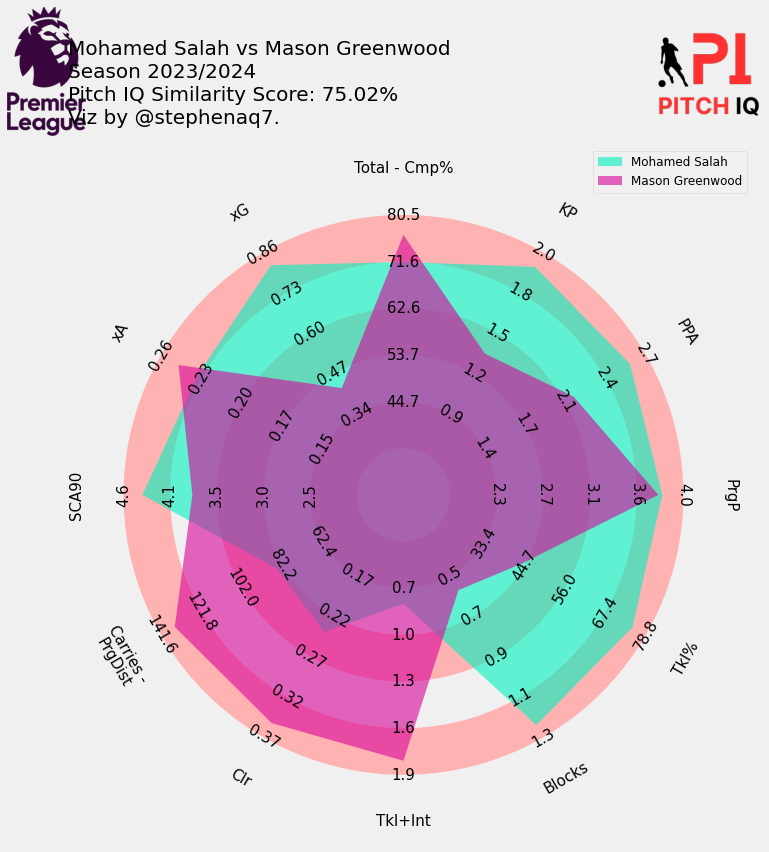

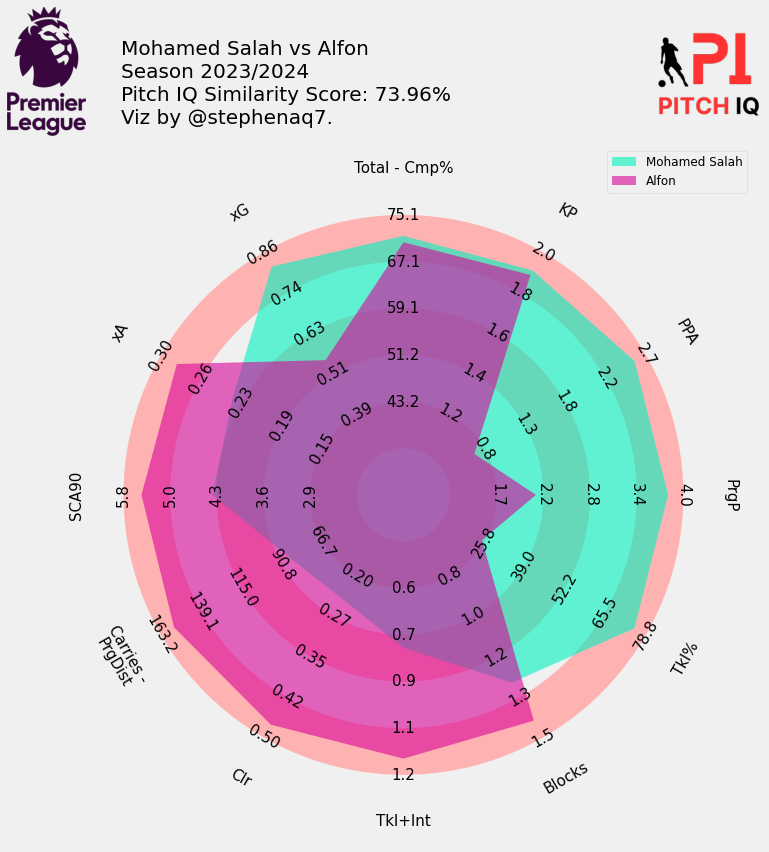

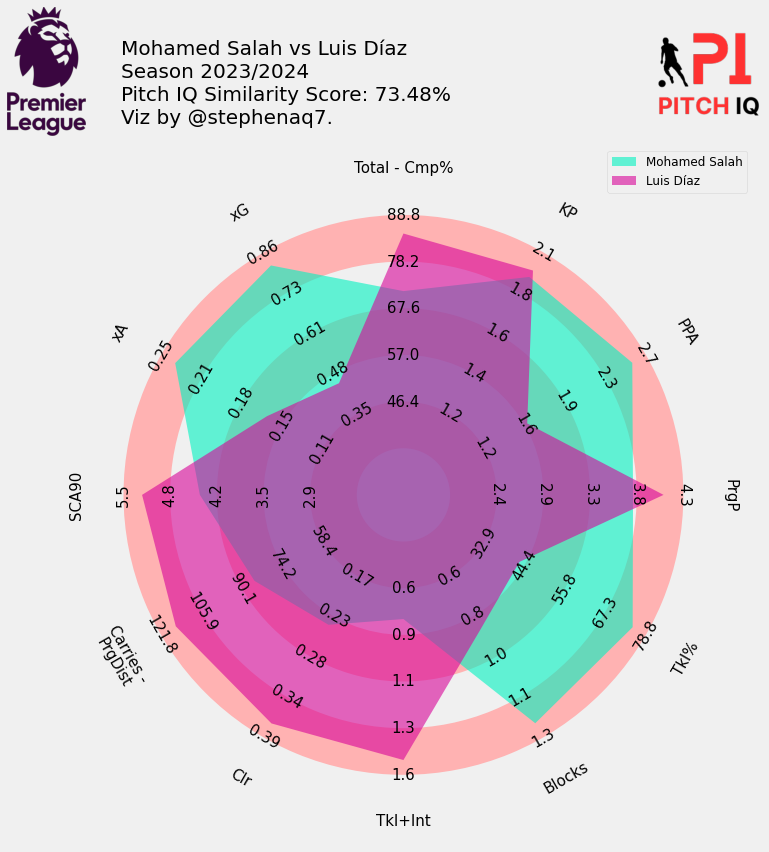

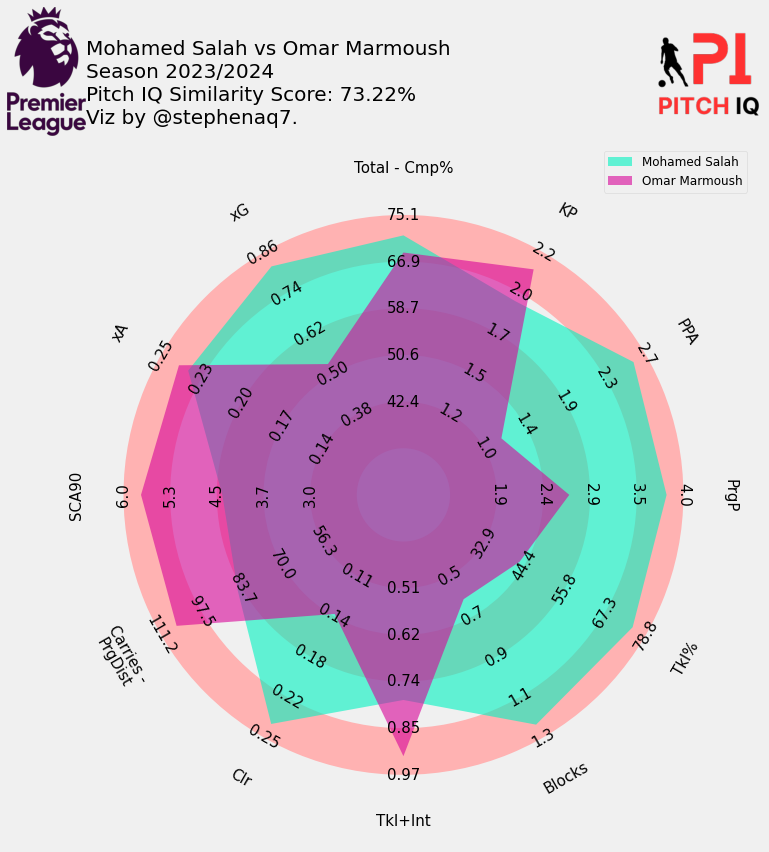

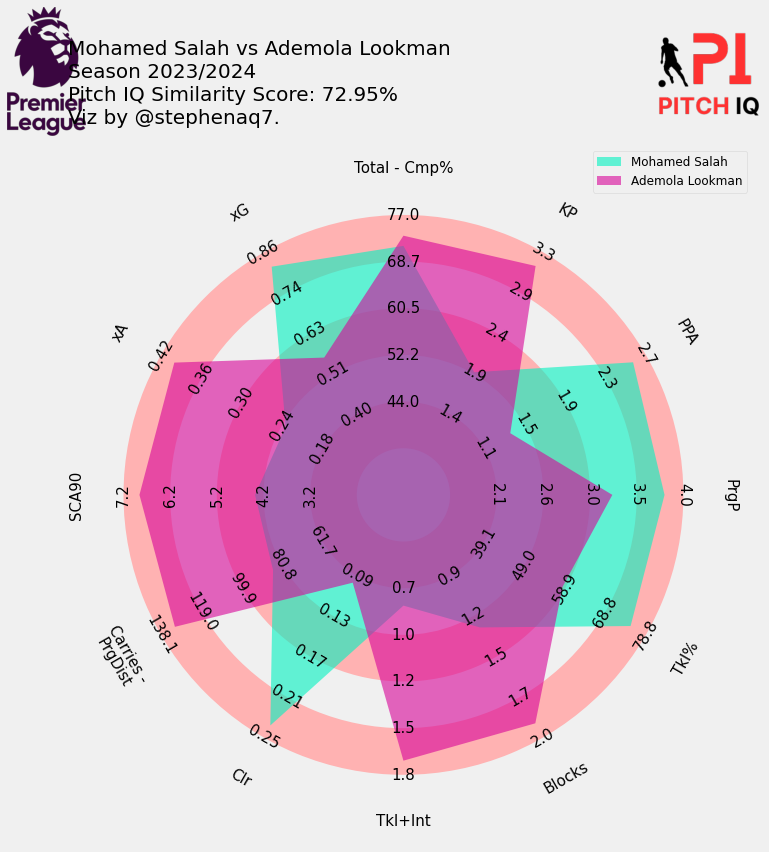

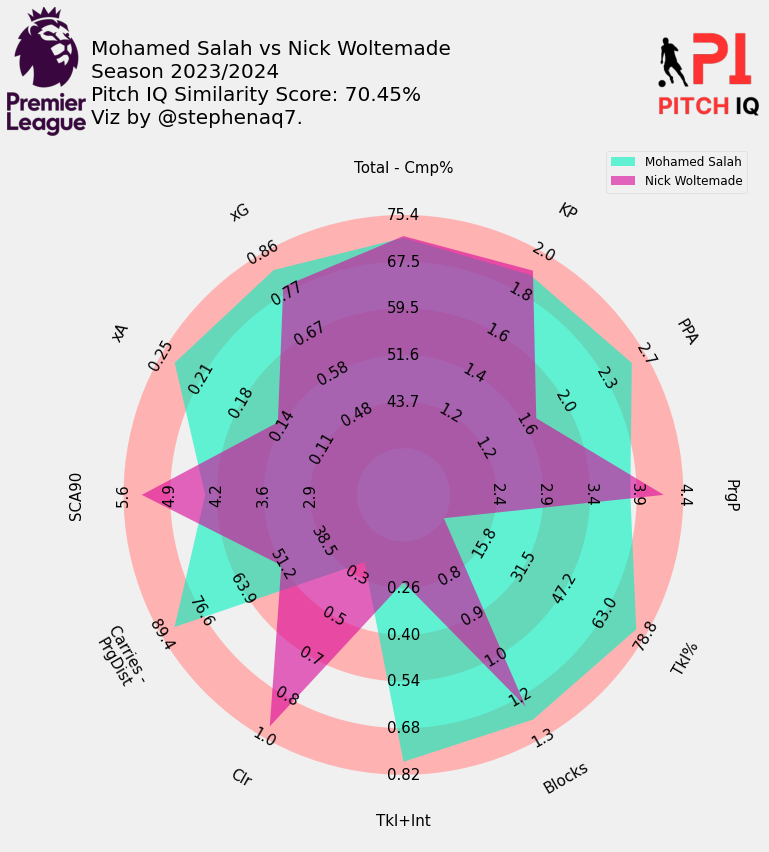

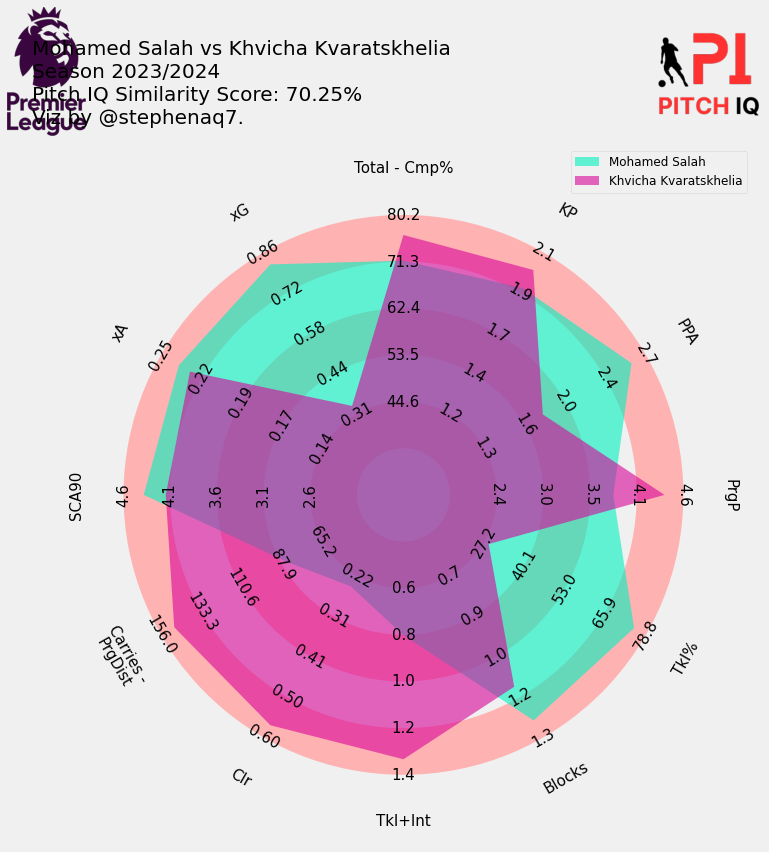

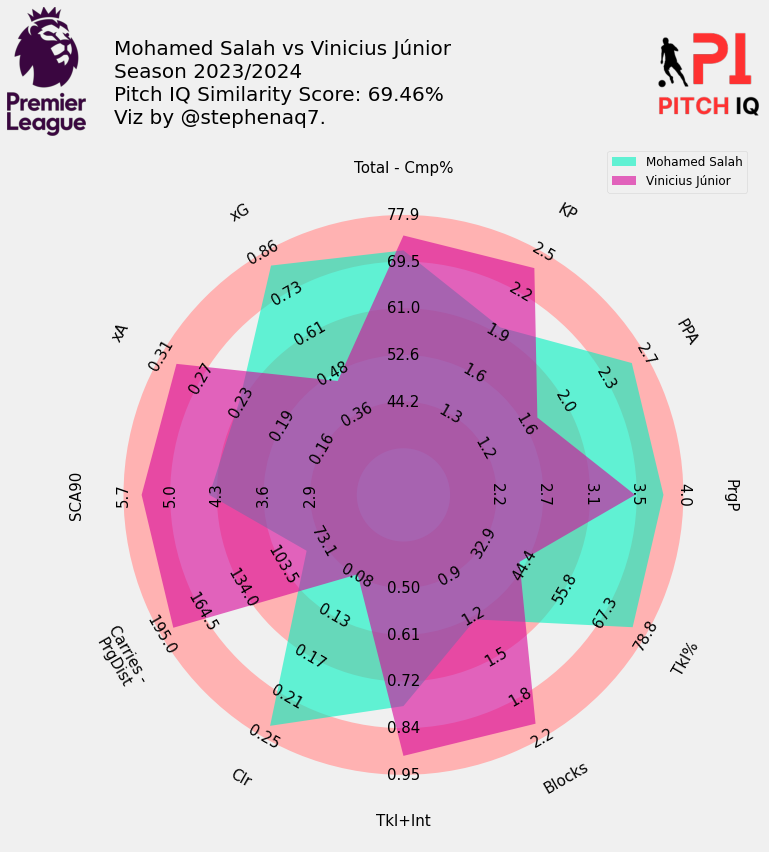

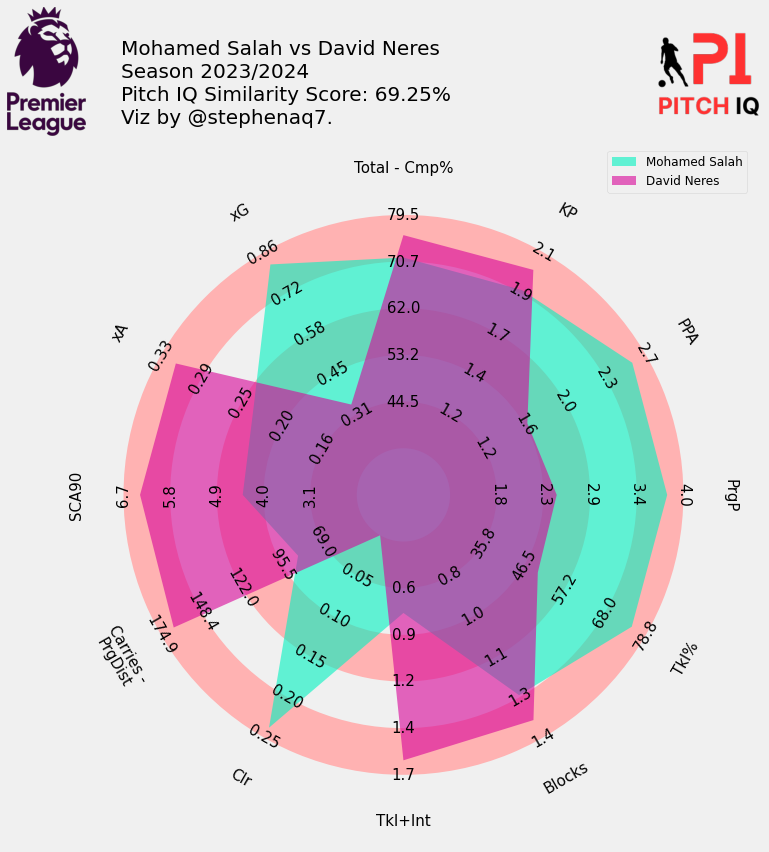

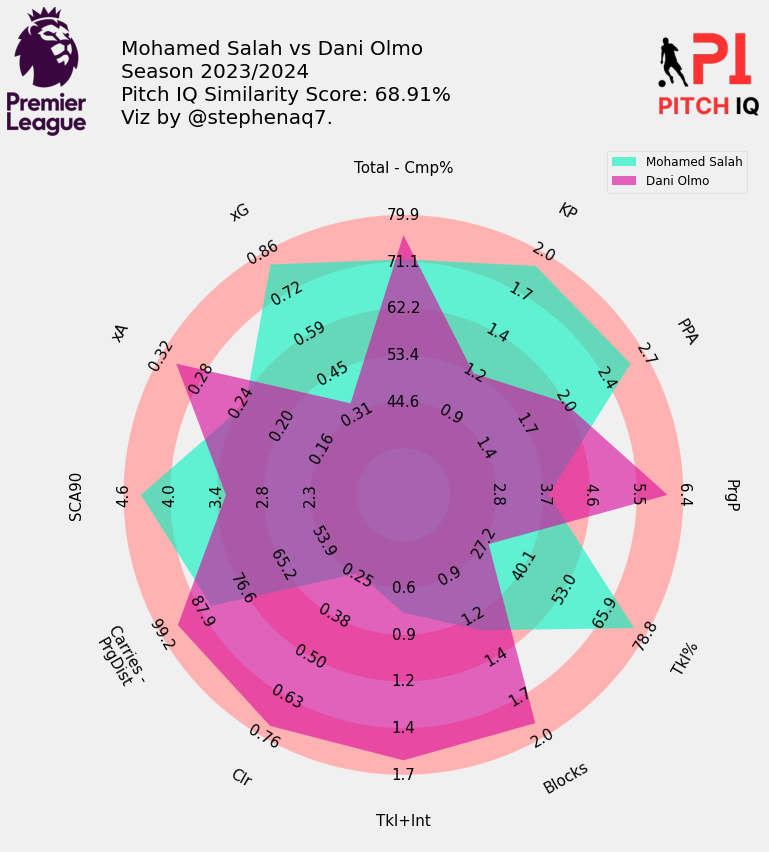

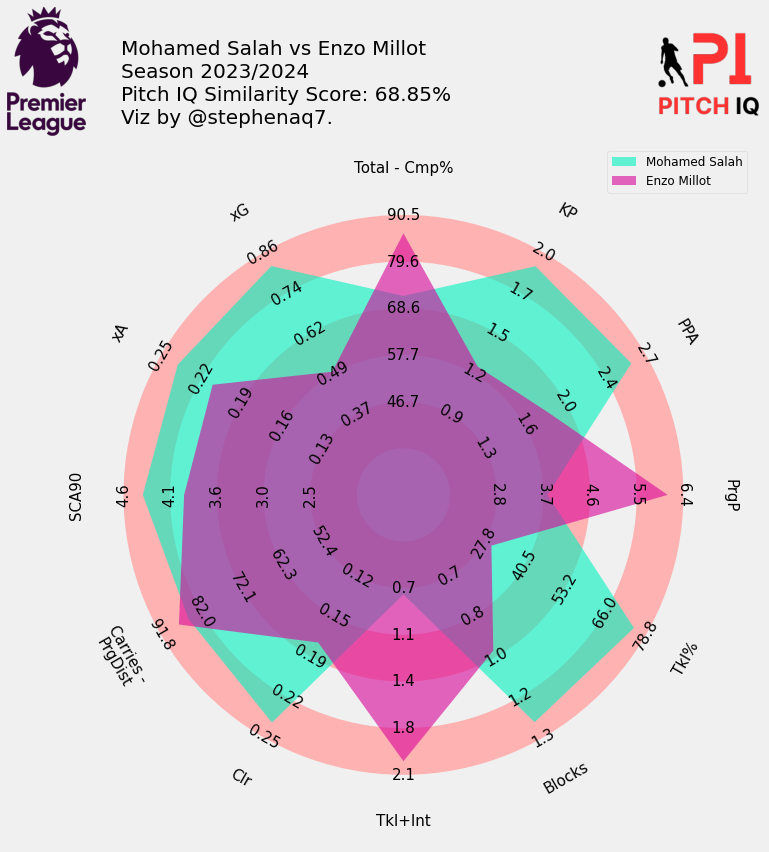

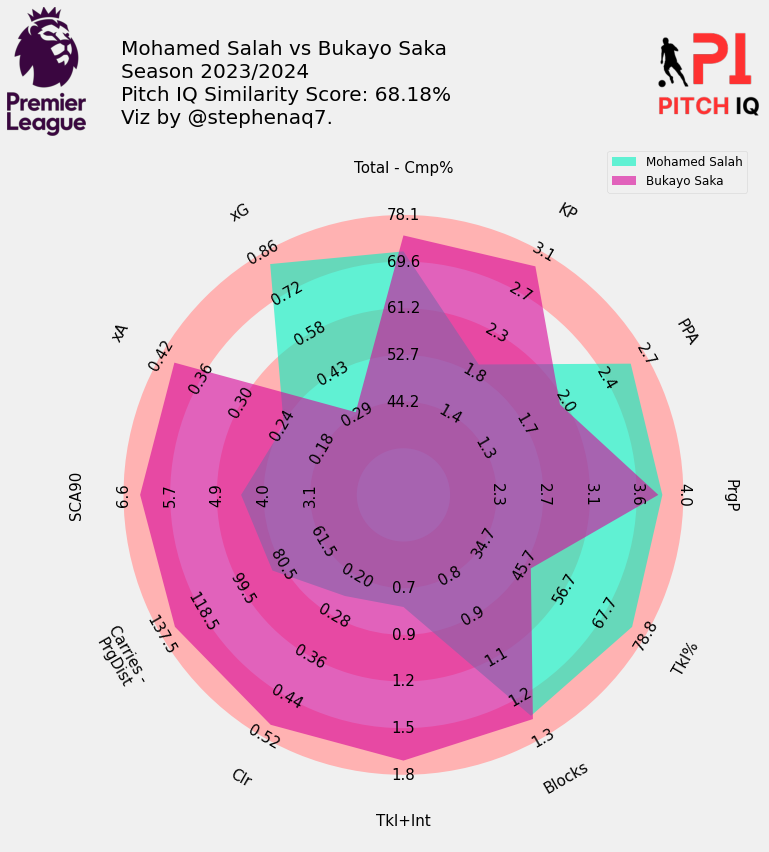

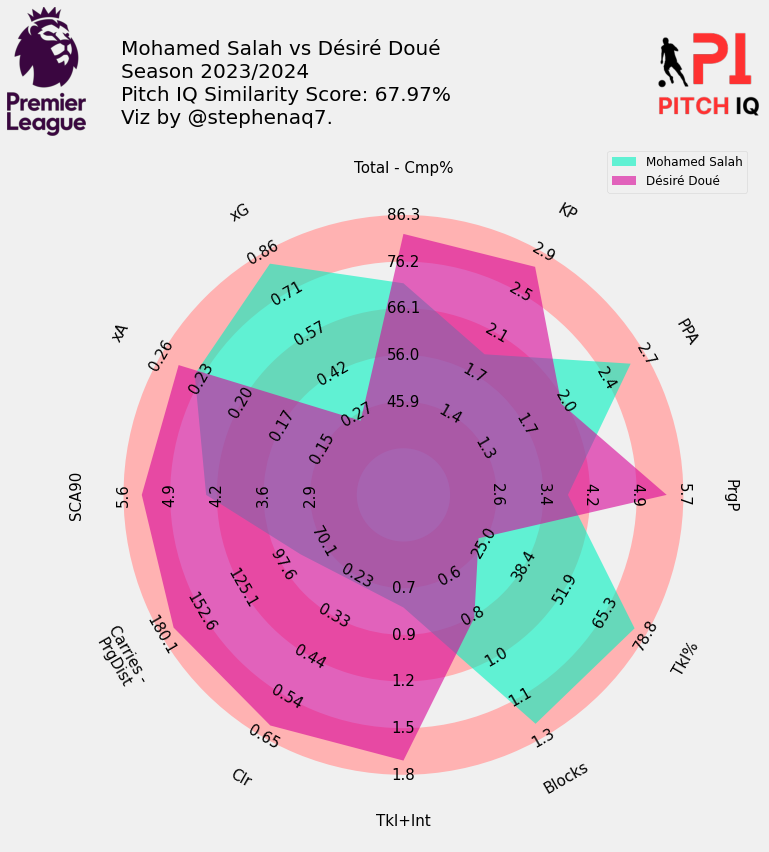

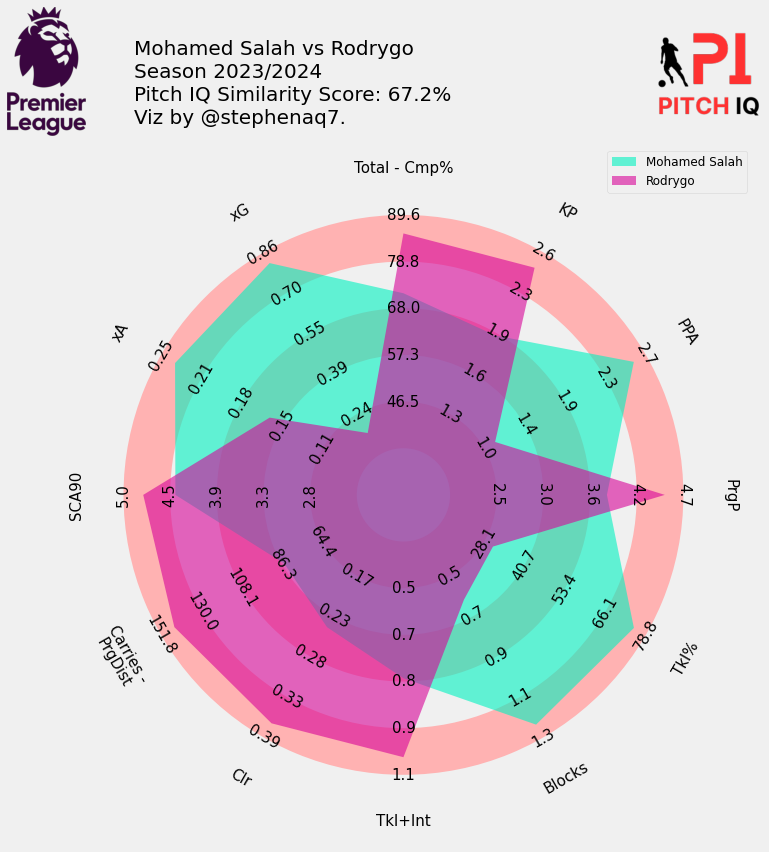

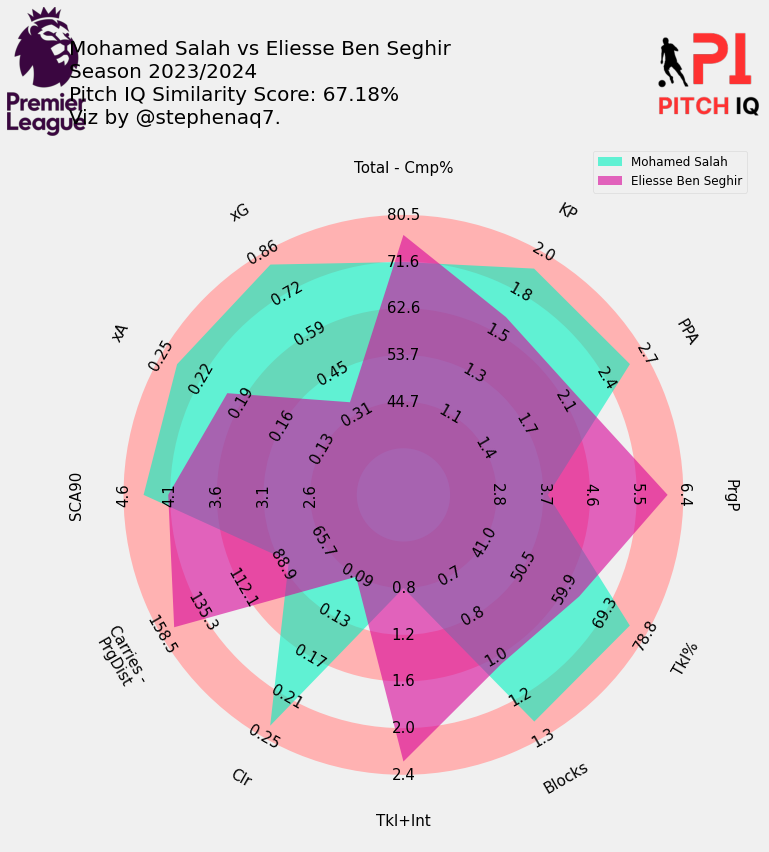

In [193]:
plot_comparison_radars(player_name, params, comparative_list, pitch_iq_scores, mertrics_similarity, sim_index)

In [194]:
mertrics_similarity

Player  perc_similarity   Nation    Pos           Squad  \
0                Jon Rowe        84.710894  eng ENG  FW,MF       Marseille   
2         Bradley Barcola        79.319957   fr FRA     FW       Paris S-G   
3             Rafael Leão        78.756726   pt POR     FW           Milan   
4            Noni Madueke        77.697084  eng ENG     FW         Chelsea   
6      Jacob Bruun Larsen        76.897448   dk DEN  FW,MF      Hoffenheim   
7         Mason Greenwood        75.020692  eng ENG  FW,MF       Marseille   
8                   Alfon        73.958038   es ESP  FW,MF      Celta Vigo   
10              Luis Díaz        73.483494   co COL     FW       Liverpool   
11          Omar Marmoush        73.224763   eg EGY  FW,MF  Eint Frankfurt   
13        Ademola Lookman        72.951416   ng NGA  FW,MF        Atalanta   
18         Nick Woltemade        70.453580   de GER  FW,MF       Stuttgart   
19  Khvicha Kvaratskhelia        70.246751   ge GEO  FW,MF          Napoli   
21        Vinicius Júnior        69.459951   br BRA     FW     Real Madrid   
22            David Neres        69.252374   br BRA  FW,MF          Napoli   
23              Dani Olmo        68.910117   es ESP  MF,FW       Barcelona   
24            Enzo Millot        68.853388   fr FRA  MF,FW       Stuttgart   
25            Bukayo Saka        68.182345  eng ENG  FW,MF         Arsenal   
26            Désiré Doué        67.970596   fr FRA     FW       Paris S-G   
28                Rodrygo        67.196182   br BRA     FW     Real Madrid   
29     Eliesse Ben Seghir        67.175400   ma MAR  MF,FW          Monaco   

    Age position_group   90s  Total - Cmp%        KP        TB        Sw  \
0    21       Forwards   4.3          82.7  2.093023  0.697674  0.000000   
2    22       Forwards  11.7          82.7  1.794872  0.170940  0.085470   
3    25       Forwards  11.5          76.9  2.434783  0.521739  0.173913   
4    22       Forwards  11.5          79.4  1.391304  0.086957  0.173913   
6    26       Forwards   4.4          74.2  1.818182  0.454545  0.454545   
7    23       Forwards  14.1          76.7  1.347518  0.212766  1.063830   
8    25       Forwards   4.2          70.4  1.904762  0.000000  0.000000   
10   27       Forwards  10.7          84.6  1.962617  0.093458  0.000000   
11   25       Forwards  14.1          68.5  2.127660  0.354610  0.000000   
13   27       Forwards  10.4          73.3  3.173077  0.192308  0.096154   
18   22       Forwards   4.1          71.8  1.951220  0.243902  0.000000   
19   23       Forwards  12.3          76.4  2.032520  0.569106  0.406504   
21   24       Forwards  12.2          74.2  2.377049  0.491803  0.737705   
22   27       Forwards   4.4          75.7  2.045455  0.227273  0.000000   
23   26       Forwards   6.9          76.1  1.159420  1.014493  0.579710   
24   22       Forwards  11.4          86.2  1.228070  0.175439  0.350877   
25   23       Forwards  14.1          74.4  2.978723  0.283688  0.141844   
26   19       Forwards   6.5          82.2  2.769231  0.461538  0.461538   
28   23       Forwards  10.9          85.3  2.477064  0.091743  0.000000   
29   19       Forwards  11.6          76.7  1.637931  0.431034  0.172414   

         PPA      PrgP  Tkl%    Blocks   Tkl+Int       Clr  Carries - PrgDist  \
0   1.162791  2.790698  66.7  1.395349  1.627907  0.000000         104.186047   
2   1.452991  3.333333   7.7  1.196581  1.709402  0.341880         149.230769   
3   1.913043  4.000000  50.0  1.043478  0.956522  0.000000         126.956522   
4   2.086957  3.826087  42.9  0.869565  1.652174  0.434783         163.217391   
6   1.363636  3.636364  37.5  0.681818  1.136364  0.454545         107.045455   
7   2.127660  3.758865  44.0  0.567376  1.773050  0.354610         134.822695   
8   0.714286  2.142857  25.0  1.428571  1.190476  0.476190         155.476190   
10  1.588785  4.112150  42.9  0.841121  1.495327  0.373832         115.981308   
11  1.205674  2.695035  42.9  0.638298  0.921986  0.14

In [195]:
mertrics_similarity = mertrics_similarity.rename(columns={'Squad': 'team'})
fm_ids = pd.read_csv("CSVs/Top6_leagues_fotmob_ids.csv")
fm_ids = fm_ids[["team", "team_id"]]

mertrics_similarity = mertrics_similarity.merge(fm_ids, on='team', how='left')
mertrics_similarity = mertrics_similarity.dropna(subset=['team_id'])
mertrics_similarity['team_id'] = mertrics_similarity['team_id'].astype(float).astype(int)

mertrics_similarity

Player  perc_similarity   Nation    Pos            team  \
0                Jon Rowe        84.710894  eng ENG  FW,MF       Marseille   
1         Bradley Barcola        79.319957   fr FRA     FW       Paris S-G   
2             Rafael Leão        78.756726   pt POR     FW           Milan   
3            Noni Madueke        77.697084  eng ENG     FW         Chelsea   
4      Jacob Bruun Larsen        76.897448   dk DEN  FW,MF      Hoffenheim   
5         Mason Greenwood        75.020692  eng ENG  FW,MF       Marseille   
6                   Alfon        73.958038   es ESP  FW,MF      Celta Vigo   
7               Luis Díaz        73.483494   co COL     FW       Liverpool   
8           Omar Marmoush        73.224763   eg EGY  FW,MF  Eint Frankfurt   
9         Ademola Lookman        72.951416   ng NGA  FW,MF        Atalanta   
10         Nick Woltemade        70.453580   de GER  FW,MF       Stuttgart   
11  Khvicha Kvaratskhelia        70.246751   ge GEO  FW,MF          Napoli   
12        Vinicius Júnior        69.459951   br BRA     FW     Real Madrid   
13            David Neres        69.252374   br BRA  FW,MF          Napoli   
14              Dani Olmo        68.910117   es ESP  MF,FW       Barcelona   
15            Enzo Millot        68.853388   fr FRA  MF,FW       Stuttgart   
16            Bukayo Saka        68.182345  eng ENG  FW,MF         Arsenal   
17            Désiré Doué        67.970596   fr FRA     FW       Paris S-G   
18                Rodrygo        67.196182   br BRA     FW     Real Madrid   
19     Eliesse Ben Seghir        67.175400   ma MAR  MF,FW          Monaco   

    Age position_group   90s  Total - Cmp%        KP        TB        Sw  \
0    21       Forwards   4.3          82.7  2.093023  0.697674  0.000000   
1    22       Forwards  11.7          82.7  1.794872  0.170940  0.085470   
2    25       Forwards  11.5          76.9  2.434783  0.521739  0.173913   
3    22       Forwards  11.5          79.4  1.391304  0.086957  0.173913   
4    26       Forwards   4.4          74.2  1.818182  0.454545  0.454545   
5    23       Forwards  14.1          76.7  1.347518  0.212766  1.063830   
6    25       Forwards   4.2          70.4  1.904762  0.000000  0.000000   
7    27       Forwards  10.7          84.6  1.962617  0.093458  0.000000   
8    25       Forwards  14.1          68.5  2.127660  0.354610  0.000000   
9    27       Forwards  10.4          73.3  3.173077  0.192308  0.096154   
10   22       Forwards   4.1          71.8  1.951220  0.243902  0.000000   
11   23       Forwards  12.3          76.4  2.032520  0.569106  0.406504   
12   24       Forwards  12.2          74.2  2.377049  0.491803  0.737705   
13   27       Forwards   4.4          75.7  2.045455  0.227273  0.000000   
14   26       Forwards   6.9          76.1  1.159420  1.014493  0.579710   
15   22       Forwards  11.4          86.2  1.228070  0.175439  0.350877   
16   23       Forwards  14.1          74.4  2.978723  0.283688  0.141844   
17   19       Forwards   6.5          82.2  2.769231  0.461538  0.461538   
18   23       Forwards  10.9          85.3  2.477064  0.091743  0.000000   
19   19       Forwards  11.6          76.7  1.637931  0.431034  0.172414   

         PPA      PrgP  Tkl%    Blocks   Tkl+Int       Clr  Carries - PrgDist  \
0   1.162791  2.790698  66.7  1.395349  1.627907  0.000000         104.186047   
1   1.452991  3.333333   7.7  1.196581  1.709402  0.341880         149.230769   
2   1.913043  4.000000  50.0  1.043478  0.956522  0.000000         126.956522   
3   2.086957  3.826087  42.9  0.869565  1.652174  0.434783         163.217391   
4   1.363636  3.636364  37.5  0.681818  1.136364  0.454545         107.045455   
5   2.127660  3.758865  44.0  0.567376  1.773050  0.354610         134.822695   
6   0.714286  2.142857  25.0  1.428571  1.190476  0.476190         155.476190   
7   1.588785  4.112150  42.9  0.841121  1.495327  0.373832         115.981308   
8   1.205674  2.695035  42.9  0.638298  0.921986  0.14

In [196]:
mertrics_similarity[['perc_similarity', 'Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']] = \
    mertrics_similarity[['perc_similarity', 'Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']].round(2)

# Storing the rounded values in df_final
df_final = mertrics_similarity[['Player', 'Pos','team_id','perc_similarity', 'Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']]
metric_scores =['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']

sim_player_vals = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][metric_scores].values.tolist()

sim_player_vals = [val for sublist in sim_player_vals for val in sublist]
df_final['Δ% Passing'] = ((df_final['Passing_Score'] - sim_player_vals[0]) / sim_player_vals[0]).round(1) * 100
df_final['Δ% Defending'] = ((df_final['Defending_Score'] - sim_player_vals[1]) / sim_player_vals[1]).round(1) * 100
df_final['Δ% Creation'] = ((df_final['Creation_Score'] - sim_player_vals[2]) / sim_player_vals[2]).round(1) * 100
df_final['Δ% Shooting'] = ((df_final['Shooting_Score'] - sim_player_vals[3]) / sim_player_vals[3]).round(1) * 100

df_final = df_final[::-1]


/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

In [197]:
sim_player = pitch_iq_scores[pitch_iq_scores['Player'] == player_name][metric_scores]
sim_player

Passing_Score  Defending_Score  Creation_Score  Shooting_Score
381       7.614571         7.826414        8.195367        8.818217

In [198]:
def perc_battery(perc_similarity, ax):
    '''
    This function takes an integer and an axes and 
    plots a battery chart.
    '''
    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.barh([0.5], [1], fc = 'white', ec='black', height=.35)
    ax.barh([0.5], [perc_similarity/100], fc = '#00529F', height=.35)
    text_ = ax.annotate(
        xy=((perc_similarity/100), .5),
        text=f'{(perc_similarity/100):.0%}',
        xytext=(-8,0),
        textcoords='offset points',
        weight='bold',
        color='#EFE9E6',
        va='center',
        ha='center',
        size=8
    )
    ax.set_axis_off()
    return ax

def ax_logo(team_id, ax):
    '''
    Plots the logo of the team at a specific axes.
    Args:
        team_id (int): the id of the team according to Fotmob. You can find it in the url of the team page.
        ax (object): the matplotlib axes where we'll draw the image.
    '''
    fotmob_url = 'https://images.fotmob.com/image_resources/logo/teamlogo/'
    club_icon = Image.open(urllib.request.urlopen(f'{fotmob_url}{team_id}.png'))
    ax.imshow(club_icon)
    ax.axis('off')
    return ax

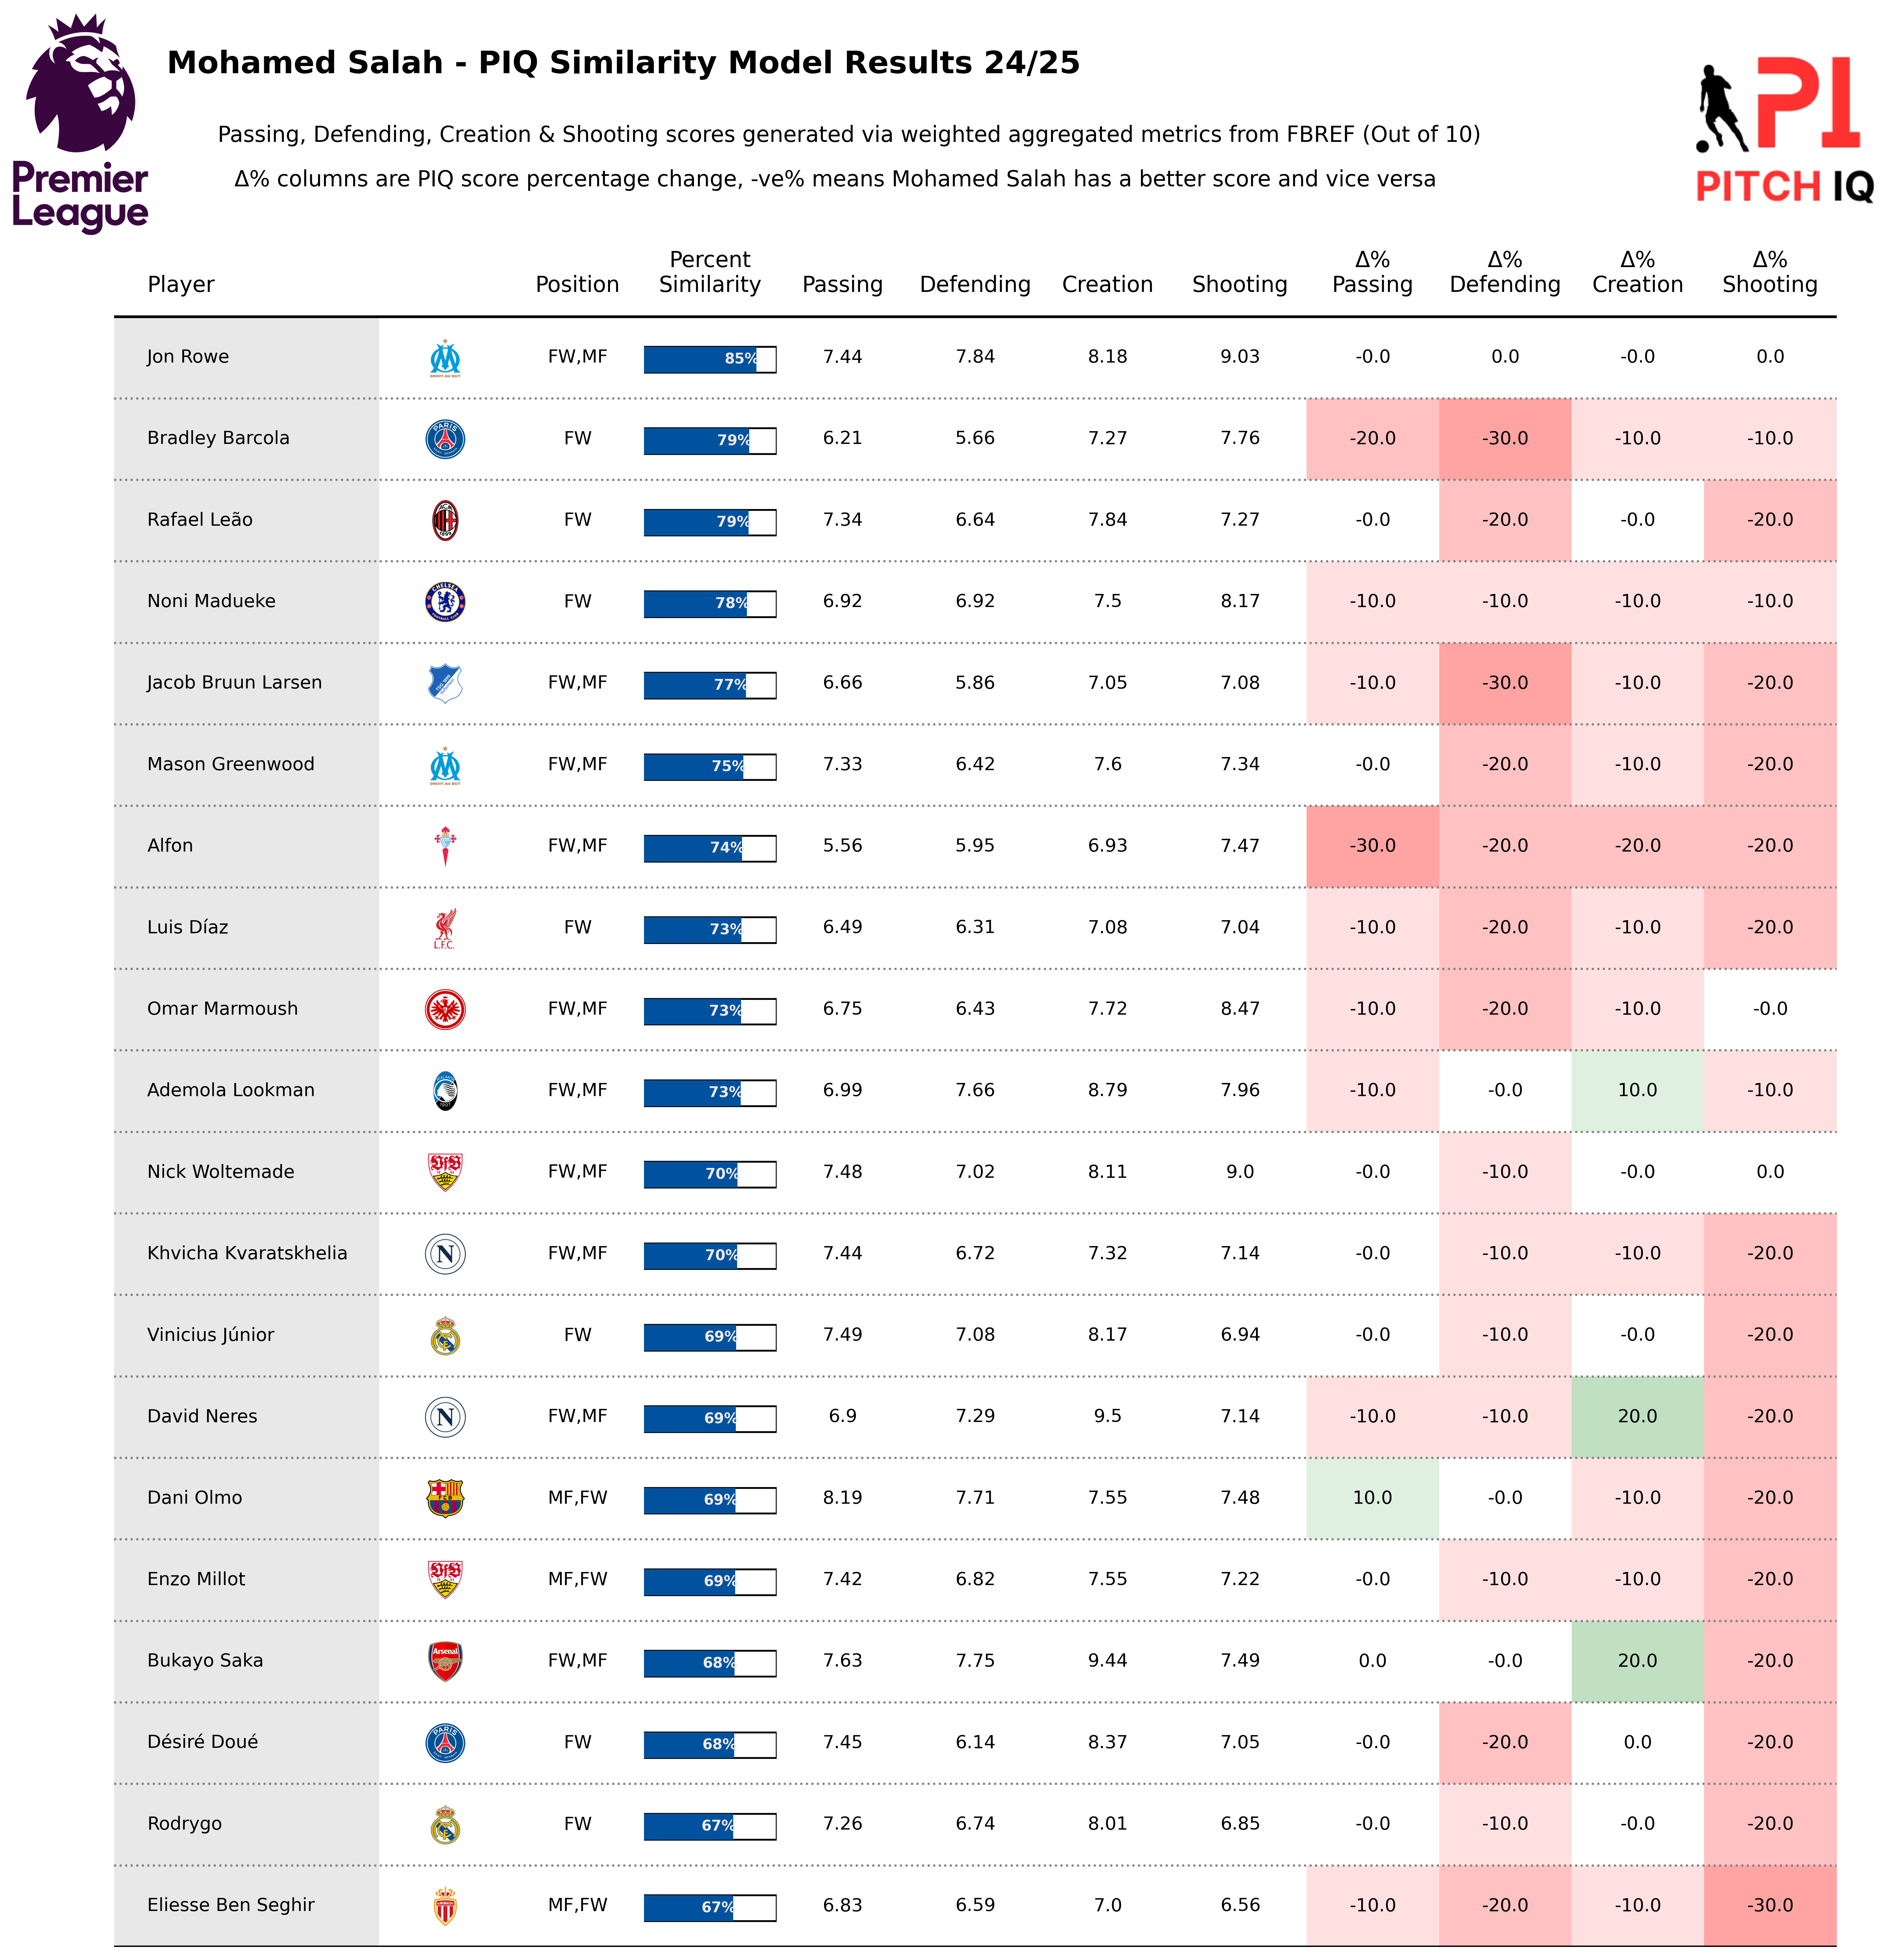

In [204]:
fig = plt.figure(figsize=(17,17), dpi=400)
ax = plt.subplot()

ncols = 12
nrows = df_final.shape[0]

ax.set_xlim(0, ncols + 1)
ax.set_ylim(0, nrows + 1)

positions = [0.25, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5, 12.5, 13.5]
columns = ['Player', 'Pos', 'perc_similarity', 'Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score', 'Δ% Passing', 'Δ% Defending', 'Δ% Creation', 'Δ% Shooting']

# -- Add table's main text
for i in range(nrows):
    for j, column in enumerate(columns):
        if j == 0:
            ha = 'left'
        else:
            ha = 'center'
        if column == 'perc_similarity':
            continue
        else:
            text_label = f'{df_final[column].iloc[i]}'
            weight = 'normal'
        ax.annotate(
            xy=(positions[j], i + .5),
            text=text_label,
            ha=ha,
            va='center',
            size = 10,
            weight=weight
        )

# -- Transformation functions
DC_to_FC = ax.transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))
# -- Add nation axes
ax_point_1 = DC_to_NFC([2.25, 0.25])
ax_point_2 = DC_to_NFC([2.75, 0.75])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([2.25, x + .25])
    flag_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    ax_logo(df_final['team_id'].iloc[x], flag_ax)

ax_point_1 = DC_to_NFC([4, 0.05])
ax_point_2 = DC_to_NFC([5, 0.95])
ax_width = abs(ax_point_1[0] - ax_point_2[0])
ax_height = abs(ax_point_1[1] - ax_point_2[1])
for x in range(0, nrows):
    ax_coords = DC_to_NFC([4, x + .025])
    bar_ax = fig.add_axes(
        [ax_coords[0], ax_coords[1], ax_width, ax_height]
    )
    perc_battery(df_final['perc_similarity'].iloc[x], bar_ax)

# -- Add column names
column_names = ['Player', 'Position', 'Percent\nSimilarity','Passing', 'Defending', 'Creation', 'Shooting','Δ%\nPassing','Δ%\nDefending','Δ%\nCreation','Δ%\nShooting']
for index, c in enumerate(column_names):
        if index == 0:
            ha = 'left'
        else:
            ha = 'center'
        ax.annotate(
            xy=(positions[index], nrows + .25),
            text=column_names[index],
            ha=ha,
            va='bottom',
            size = 12,
            weight='book'
        )

# Add dividing lines
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [nrows, nrows], lw=1.5, color='black', marker='', zorder=4)
ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [0, 0], lw=1.5, color='black', marker='', zorder=4)
for x in range(1, nrows):
    ax.plot([ax.get_xlim()[0], ax.get_xlim()[1]], [x, x], lw=1.15, color='gray', ls=':', zorder=3 , marker='')

ax.fill_between(
    x=[0,2],
    y1=nrows,
    y2=0,
    color='lightgrey',
    alpha=0.5,
    ec='None'
)

# Custom colormap and normalization
cmap = mcolors.LinearSegmentedColormap.from_list('red_green', ['red', 'white', 'green'])
norm = mcolors.Normalize(vmin=-50, vmax=50)

# Example of Δ% columns to be visualized
delta_columns = ['Δ% Passing', 'Δ% Defending', 'Δ% Creation', 'Δ% Shooting']

# Loop through delta columns and fill between with corresponding color
for idx, col in enumerate(delta_columns):
    for i in range(nrows):
        value = df_final[col].iloc[i]
        ax.fill_between(
            x=[9 + idx, 10 + idx],
            y1=i + 1,
            y2=i,
            color=cmap(norm(value)),
            alpha=0.6,
            ec='None'
        )

ax.set_axis_off()

# -- Final details
league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
league_ax = fig.add_axes([0.06, 0.88, 0.10, 0.10], zorder=1)
league_ax.imshow(league_icon)
league_ax.axis("off")

ax.tick_params(axis='both', which='major', labelsize=8)

fig_text(
     x = 0.56, y = 0.95, 
    s = f'{player_name} - PIQ Similarity Model Results 24/25',
    va = "bottom", ha = "right",
    fontsize = 17, color = "black", font = "Karla", weight = "bold"
)

fig_text(
     x = 0.74, y = 0.92, 
    s = f'Passing, Defending, Creation & Shooting scores generated via weighted aggregated metrics from FBREF (Out of 10)',
    va = "bottom", ha = "right",
    fontsize = 12, color = "black", font = "Karla", weight = "book"
)
fig_text(
     x = 0.72, y = 0.90, 
    s = f'Δ% columns are PIQ score percentage change, -ve% means {player_name} has a better score and vice versa',
    va = "bottom", ha = "right",
    fontsize = 12, color = "black", font = "Karla", weight = "book"
)

### Add Stats by Steve logo
ax3 = fig.add_axes([0.83, 0.13, 0.09, 1.60])
ax3.axis('off')
img = plt.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
ax3.imshow(img)

/Users/stephenahiabah/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.


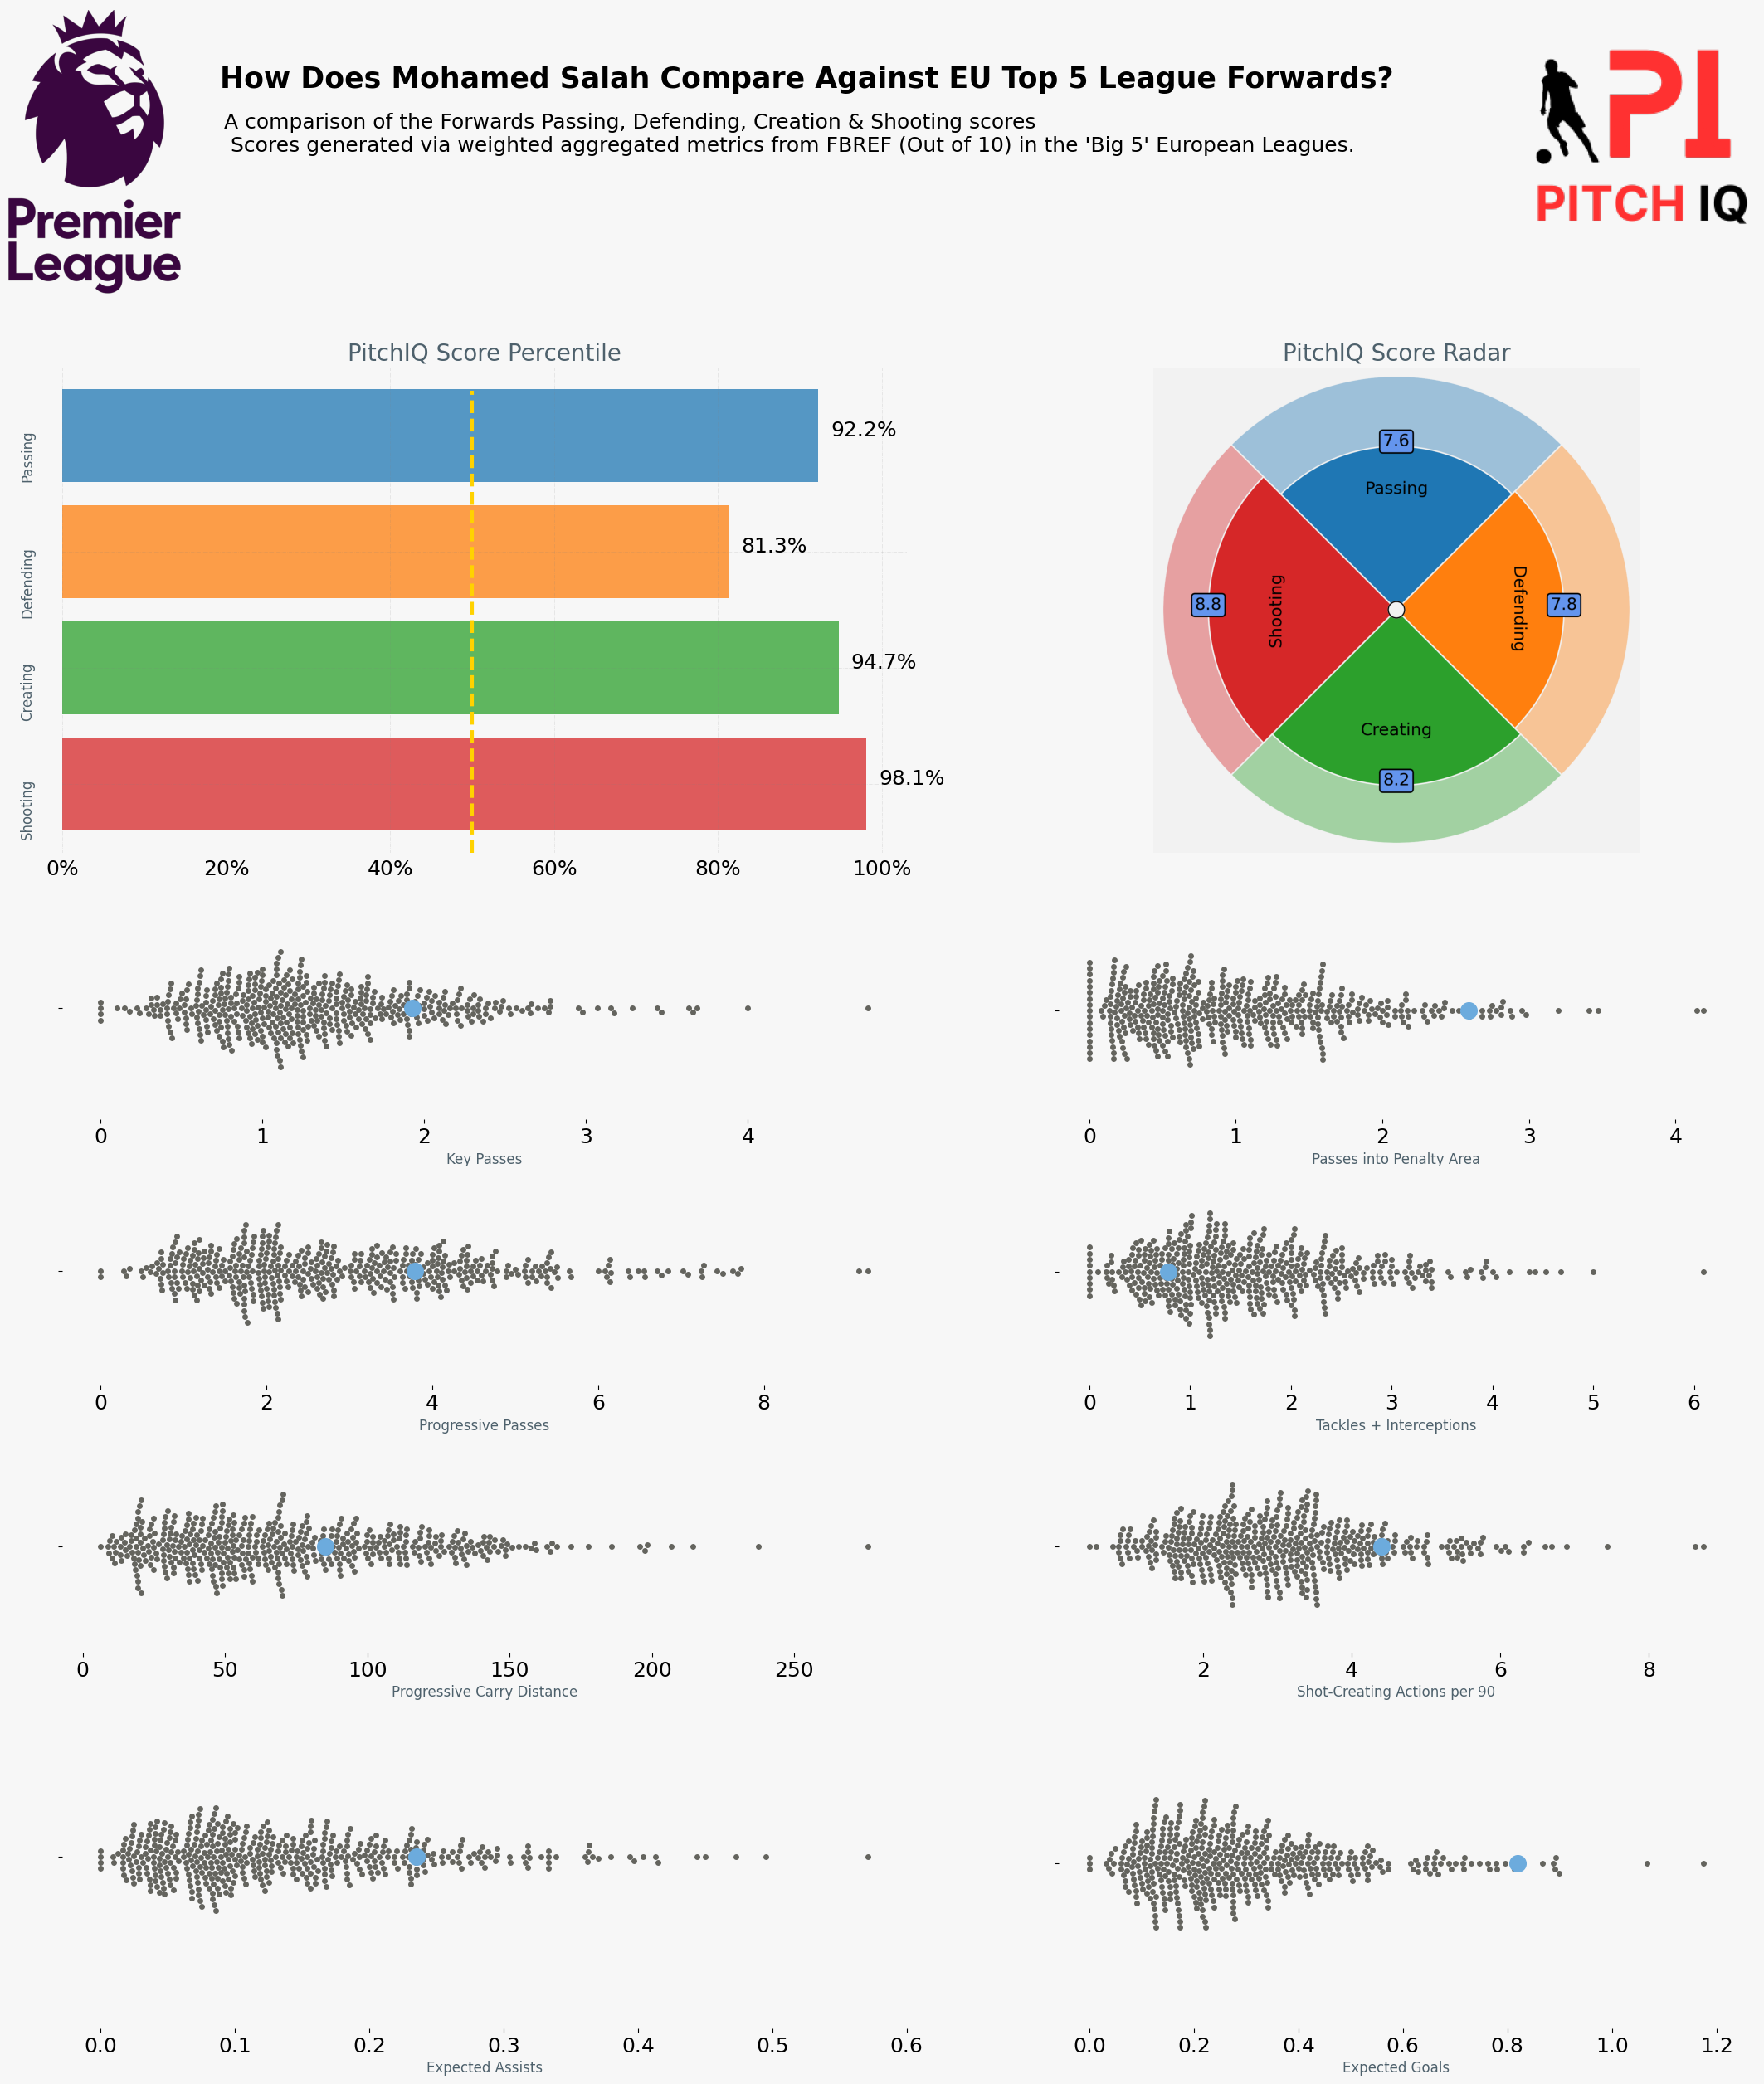

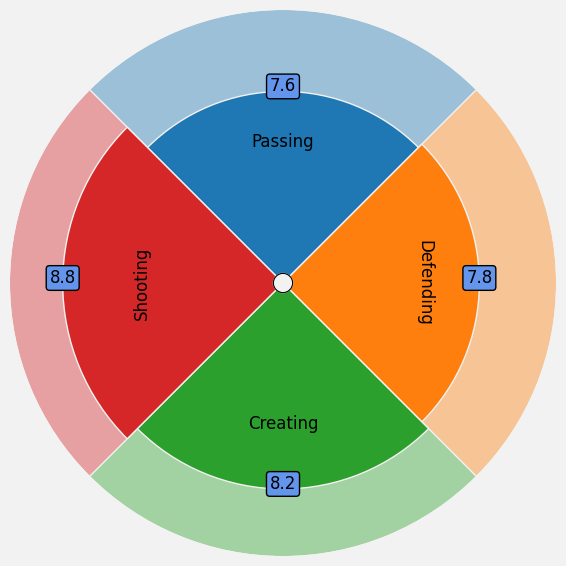

In [200]:
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib import image
import matplotlib as mpl
from mplsoccer import PyPizza, FontManager

from scipy.stats import percentileofscore

def calculate_percentiles(sim_player, pitch_iq_scores):
    # Define the columns to compare
    score_columns = ['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']
    
    # Initialize an empty dictionary to store percentiles
    percentiles = {}
    
    # Iterate over each score column
    for col in score_columns:
        sim_score = sim_player[col].values[0]
        percentiles[col] = percentileofscore(pitch_iq_scores[col], sim_score, kind='rank')
    
    # Create a new DataFrame from the percentiles dictionary
    sim_player_perc = pd.DataFrame([percentiles])
    
    return sim_player_perc

def create_combined_plot(sim_player, player_name, pos, pitch_iq_scores):
    style.use('fivethirtyeight')
    # Filter dataset for player and select columns of interest
    lst_cols_pr = ['Passing_Score', 'Defending_Score', 'Creation_Score', 'Shooting_Score']
    sim_player_perc = calculate_percentiles(sim_player, pitch_iq_scores)
    df_player_pr = sim_player_perc.reset_index(drop=True)
    df_player_pr_t = df_player_pr[lst_cols_pr].T.reset_index(drop=False)
    df_player_pr_t.columns = ['Metric', 'PR']

    dict_metrics = {
        'Passing_Score': 'Passing',
        'Defending_Score': 'Defending',
        'Creation_Score': 'Creating',
        'Shooting_Score': 'Shooting'
    }
    df_player_pr_t['Metric'] = df_player_pr_t['Metric'].map(dict_metrics)

    # Define fonts and colors
    background = '#f7f7f7'
    text_color = 'black'
    mpl.rcParams.update(mpl.rcParamsDefault)
    mpl.rcParams['xtick.color'] = text_color
    mpl.rcParams['ytick.color'] = text_color
    mpl.rcParams.update({'font.size': 18})

    # Define labels and metrics
    metric = df_player_pr_t['Metric']
    pr = df_player_pr_t['PR']

    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

    # Create combined figure
    fig = plt.figure(figsize=(26, 26))
    gs = fig.add_gridspec(6, 2, height_ratios=[1, 1, 1, 1, 1, 1.5], width_ratios=[1, 0.8])
    fig.set_facecolor(background)

    # Bar Chart on the top left
    ax1 = fig.add_subplot(gs[0:2, 0])
    ax1.set_facecolor(background)
    ax1.barh(metric, pr / 100, color=colors, alpha=0.75)
    for s in ['top', 'bottom', 'left', 'right']:
        ax1.spines[s].set_visible(False)
    ax1.xaxis.set_ticks_position('none')
    ax1.yaxis.set_ticks_position('none')
    ax1.xaxis.set_tick_params(pad=2)
    ax1.yaxis.set_tick_params(pad=20)
    ax1.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.2)
    ax1.invert_yaxis()
    for i in ax1.patches:
        ax1.text(i.get_width() + 0.015, i.get_y() + 0.4, str(round((100 * i.get_width()), 1)) + '%', fontsize=18,
                   fontweight='regular', color='black')
    vals = ax1.get_xticks()
    ax1.set_xticklabels(['{:,.0%}'.format(x) for x in vals])
    ax1.set_yticklabels(df_player_pr_t['Metric'], size=12, rotation=90, color='#4E616C', font='Karla')
    ax1.set_title('PitchIQ Score Percentile', size=20, color='#4E616C', font='Karla')

    ax1.axvline(0.5, 0, 0.952, color='#FFD200', linestyle='--', linewidth=3)

    # Pizza plot on the top right
    params = list(dict_metrics.values())
    values = [round(val, 1) for val in sim_player.values.flatten().tolist()]
    baker = PyPizza(params=params, straight_line_color="#F2F2F2", straight_line_lw=1, straight_line_limit=11.0,
                    last_circle_lw=0, other_circle_lw=0, inner_circle_size=0.4)
    fig_pizza, ax_pizza = baker.make_pizza(values, figsize=(6, 6), color_blank_space="same", blank_alpha=0.4,
                                           param_location=5.5, slice_colors=colors, kwargs_slices=dict(facecolor="cornflowerblue",
                                                                                             edgecolor="#F2F2F2", zorder=2,
                                                                                             linewidth=1),
                                           kwargs_params=dict(color="#000000", fontsize=12, va="center"),
                                           kwargs_values=dict(color="#000000", fontsize=12, zorder=3,
                                                              bbox=dict(edgecolor="#000000",
                                                                        facecolor="cornflowerblue",
                                                                        boxstyle="round,pad=0.2", lw=1)))  # Rounded to 1 decimal place
    fig_pizza.savefig("pizza_plot.png", bbox_inches="tight", dpi=300)
    pizza_img = Image.open("pizza_plot.png")
    ax2 = fig.add_subplot(gs[:2, 1])
    ax2.imshow(pizza_img)
    ax2.axis('off')
    ax2.set_title('PitchIQ Score Radar', size=20, color='#4E616C', font='Karla')

    # Swarm plots on the bottom rows
    s_params = ['KP', 'PPA', 'PrgP', 'Tkl+Int', 'Carries - PrgDist', 'SCA90', 'xA', 'xG']
    s_params_dict = {
        'KP': 'Key Passes',
        'PPA': 'Passes into Penalty Area',
        'PrgP': 'Progressive Passes',
        'Tkl+Int': 'Tackles + Interceptions',
        'Carries - PrgDist': 'Progressive Carry Distance',
        'SCA90': 'Shot-Creating Actions per 90',
        'xA': 'Expected Assists',
        'xG': 'Expected Goals'
    }

    for idx, param in enumerate(s_params):
        ax = fig.add_subplot(gs[2 + idx // 2, idx % 2])
        ax.set_facecolor(background)
        ax.grid(ls='dotted', lw=.5, color='lightgrey', axis='y', zorder=1)
        sns.swarmplot(x=param, data=pitch_iq_scores, ax=ax, zorder=1, color='#64645e')
        ax.set_xlabel(s_params_dict[param], size=12, color='#4E616C', font='Karla')
        for s in ['top', 'bottom', 'left', 'right']:
            ax.spines[s].set_visible(False)
        for x in range(len(pitch_iq_scores['Player'])):
            if pitch_iq_scores['Player'][x] == player_name:
                ax.scatter(x=pitch_iq_scores[param][x], y=0, s=200, c='#6CABDD', zorder=2)
    
    # Add annotations and images
    fig.suptitle(f'How Does {player_name} Compare Against EU Top 5 League {pos}?', fontsize=25, fontweight='bold',
                 color=text_color, x=0.47,y=1.02)
    fig.text(0.2, 0.98, f'A comparison of the {pos} Passing, Defending, Creation & Shooting scores\n Scores generated via weighted aggregated metrics from FBREF (Out of 10) in the \'Big 5\' European Leagues.',
             fontsize=18, fontweight='regular', color=text_color)
    
    league_icon = Image.open("/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/Images/premier-league-2-logo.png")
    league_ax = fig.add_axes([0.1, 0.91, 0.08, 0.14], zorder=1)
    league_ax.imshow(league_icon)
    league_ax.axis("off")

    ### Add Stats by Steve logo
    ax3 = fig.add_axes([0.80, 0.14, 0.11, 1.70])
    ax3.axis('off')
    img = plt.imread('/Users/stephenahiabah/Desktop/GitHub/Webs-scarping-for-Fooball-Data-/outputs/piqmain.png')
    ax3.imshow(img)

    plt.tight_layout()
    plt.show()

create_combined_plot(sim_player, player_name, position, pitch_iq_scores)

In [201]:
# write up needed 

In [202]:
comparative_list

['Jon Rowe',
 'Bradley Barcola',
 'Rafael Leão',
 'Noni Madueke',
 'Jacob Bruun Larsen',
 'Mason Greenwood',
 'Alfon',
 'Luis Díaz',
 'Omar Marmoush',
 'Ademola Lookman',
 'Nick Woltemade',
 'Khvicha Kvaratskhelia',
 'Vinicius Júnior',
 'David Neres',
 'Dani Olmo',
 'Enzo Millot',
 'Bukayo Saka',
 'Désiré Doué',
 'Rodrygo',
 'Eliesse Ben Seghir']